<a href="https://colab.research.google.com/github/irfan7210/Cardiovascular-Risk-Prediction/blob/main/Copy123_of_Cardivascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** - Dileep Singh
##### **Team Member 2 -** - Vishal Singh
##### **Team Member 3 -** - Mohammad Irfan

# **Project Summary -**

**This project aims to use data from the ongoing cardiovascular study on residents of Framingham, Massachusetts to predict the 10-year risk of future coronary heart disease (CHD) for patients. The dataset consists of over 4,000 records and 15 attributes, including demographic, behavioral, and medical risk factors. The goal of this project is to develop a predictive model that accurately classifies patients based on their risk of CHD.**

# **GitHub Link -**

Provide your GitHub Link here.

**Problem Statement**


**Despite advances in medical technology, coronary heart disease remains a leading cause of death worldwide. The early detection of CHD risk is crucial for preventing and mitigating its impact. The current cardiovascular study on the residents of Framingham, Massachusetts provides an opportunity to use data to identify patients at risk of CHD. However, with over 4,000 records and 15 attributes, it is difficult to manually identify patients who are at high risk. This project aims to address this challenge by developing a predictive model that accurately classifies patients based on their risk of CHD. This will help to improve the early detection and prevention of CHD, reducing its impact on patients and the healthcare system.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize':(5,4),'figure.dpi':100})


# Import Libraries

from numpy import math
from numpy import loadtxt
from matplotlib import rcParams

from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.6/567.6 KB 14.6 MB/s eta 0:00:00


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset

filepath ='/content/drive/MyDrive/Project/Classification-cardiovascular/data_cardiovascular_risk.csv'
df = pd.read_csv(filepath)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print('The number of rows in data is:',df.shape[0])
print('The number of columns in data is',len(list(df.columns)))

The number of rows in data is: 3390
The number of columns in data is 17


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
# df.duplicated().sum()
duplicate_rows_in_store_data = df.duplicated().sum()
print('The number of duplicates in store data is:',duplicate_rows_in_store_data)

The number of duplicates in store data is: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<AxesSubplot:>

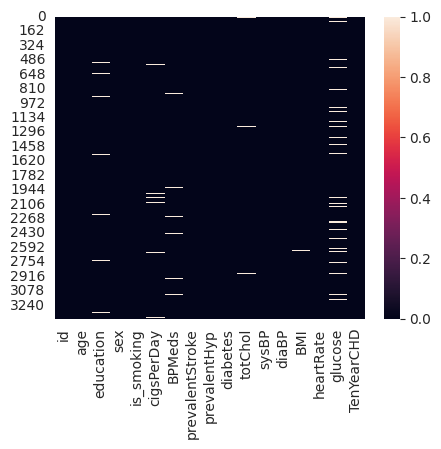

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=True)

### What did you know about your dataset?

This dataset contains many features which has null values. As we see, there are lots of null values in 'glucose' column. The features 'education', 'cigsPerDay', 'BPMeds', and 'totChol' also has missing values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print(list(df.columns))

['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [11]:
# Dataset Describe
df.describe()


id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description 

**Demographic**
* Sex: male or female("M" or "F")

* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

for col in df.columns:
  print(f'The unique values in {col} are {df[col].unique()}' )

The unique values in id are [   0    1    2 ... 3387 3388 3389]
The unique values in age are [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
The unique values in education are [ 2.  4.  1.  3. nan]
The unique values in sex are ['F' 'M']
The unique values in is_smoking are ['YES' 'NO']
The unique values in cigsPerDay are [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
The unique values in BPMeds are [ 0. nan  1.]
The unique values in prevalentStroke are [0 1]
The unique values in prevalentHyp are [0 1]
The unique values in diabetes are [0 1]
The unique values in totChol are [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 19

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Checking number of persons having heart attack
print("No. of persons having heart attack :",len(df[df['TenYearCHD']==1]))
print("No. of persons not having heart attack :",len(df[df['TenYearCHD']==0]))
# Assigning persons having haert attack
df_chd=df[(df['TenYearCHD']==1)]
# Assigning persons not having herat attack
df_notchd=df[(df['TenYearCHD']==0)]

No. of persons having heart attack : 511
No. of persons not having heart attack : 2879


In [14]:
#Here we are checking how education play an important role of controlling heart attack
pd.DataFrame(df.groupby(['education'])['TenYearCHD'].value_counts())

TenYearCHD
education TenYearCHD            
1.0       0                 1135
          1                  256
2.0       0                  872
          1                  118
3.0       0                  479
          1                   70
4.0       0                  319
          1                   54

Here we can see that less educated people are more prone to heart 
attack.

In [15]:
#Lets check which age people are at high risk of heart disease
# Lets check how much middle age are risk to heart disease
middle_age=df[(df['age']>=31) & (df['age'] <=50)]
counts_mage=middle_age['TenYearCHD'].value_counts()
midage=middle_age['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ma_con=pd.concat([counts_mage,midage], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The middle age people(age between 30 and 45) is \n {pd.DataFrame(ma_con)}')
# Lets check how much old age people are risk to heart disease
old_age=df[df['age'] >50]
counts_old=old_age['TenYearCHD'].value_counts()
olda=old_age['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
old_con=pd.concat([counts_old,olda], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The old age people(age greater than 45) is \n {pd.DataFrame(old_con)}')


The middle age people(age between 30 and 45) is 
    count       % risk of heart attack
0   1718                        91.0%
1    169                         9.0%
The old age people(age greater than 45) is 
    count       % risk of heart attack
0   1161                        77.2%
1    342                        22.8%


Here we can see that old age people are at higher risk of heart disease as compare to middle age people.

Here 1 and 0 represents:

 **1** - Having Heart disease
 
 **0** - Not having heart disease

In [16]:
# Here we are checking which sex is more prone to heart attack.
count_s=pd.DataFrame(df.groupby(['sex'])['TenYearCHD'].value_counts())
per_s=df.groupby(['sex'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([count_s,per_s], axis=1, keys=['count', 'percentage'])

count percentage
               TenYearCHD TenYearCHD
sex TenYearCHD                      
F   0                1684      87.6%
    1                 239      12.4%
M   0                1195      81.5%
    1                 272      18.5%

Here we can see that female are less prone to heart attack as compare to male.

In [17]:
# Checking smoking
count_ss=pd.DataFrame(df.groupby(['sex','is_smoking'])['TenYearCHD'].value_counts())
per_ss=df.groupby(['sex','is_smoking'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([count_ss,per_ss], axis=1, keys=['count', 'percentage'])

count percentage
                          TenYearCHD TenYearCHD
sex is_smoking TenYearCHD                      
F   NO         0                1000      87.2%
               1                 147      12.8%
    YES        0                 684      88.1%
               1                  92      11.9%
M   NO         0                 467      84.0%
               1                  89      16.0%
    YES        0                 728      79.9%
               1                 183      20.1%

Here we can see that Males are smoking more as compare to females therefore they are more prone to heart attack

In [18]:
#Checking the people who are taking BP meditation how much they are prone to heart attack
count_bp=pd.DataFrame(df.groupby(['BPMeds'])['TenYearCHD'].value_counts())
per_bp=df.groupby(['BPMeds'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([count_bp,per_bp], axis=1, keys=['count', 'percentage'])

count percentage
                  TenYearCHD TenYearCHD
BPMeds TenYearCHD                      
0.0    0                2775      85.5%
       1                 471      14.5%
1.0    0                  67      67.0%
       1                  33      33.0%

Here we can see that there are only 100 peoples taking BP meditation out of which only 33 people are prone to heart attack.

In [19]:
#Checking the people who had prviously a stroke how much they are prone to heart attack
count_ps=pd.DataFrame(df.groupby(['prevalentStroke'])['TenYearCHD'].value_counts())
per_ps=df.groupby(['prevalentStroke'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([count_ps,per_ps], axis=1, keys=['count', 'percentage'])

count percentage
                           TenYearCHD TenYearCHD
prevalentStroke TenYearCHD                      
0               0                2867      85.1%
                1                 501      14.9%
1               0                  12      54.5%
                1                  10      45.5%

Here by seeing the above plot we can see that the people which had previously a stroke is less that is 22 and out of which 10 people around 
45% are at high risk of coronary heart disease CHD.

In [20]:
#Lets check the risk of diabetic people how much they are prone to heart attack 
counts=df.groupby(['diabetes'])['TenYearCHD'].value_counts()
per=df.groupby(['diabetes'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,per], axis=1, keys=['count', 'percentage'])

count percentage
diabetes TenYearCHD                  
0        0            2825      85.5%
         1             478      14.5%
1        0              54      62.1%
         1              33      37.9%

Here we can see that there are only 87 people who are diabetic and out of which 37.9 % people are at high risk of coronary heart disesase CHD. 

In [21]:
#Lets check the patient which was hypertensive how much they are prone to heart attack
counts=df.groupby(['prevalentHyp'])['TenYearCHD'].value_counts()
per=df.groupby(['prevalentHyp'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,per], axis=1, keys=['count', 'percentage'])

count percentage
prevalentHyp TenYearCHD                  
0            0            2065      89.0%
             1             256      11.0%
1            0             814      76.1%
             1             255      23.9%

Here we can see that the people who are suffering from hypertensive is 1069 out of which 23.9 % people are more prone to heart attack.

In [22]:
# Lets check how many persons have high cholestrol levels
high_chol=df[df['totChol'] >=240]
h=high_chol['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(f'The people having cholestrol > 240 is \n {pd.DataFrame(h)}')
low_chol=df[df['totChol'] <240]
l=low_chol['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(f'The people having cholestrol < 240 is \n {pd.DataFrame(l)}')

The people having cholestrol > 240 is 
   TenYearCHD
0      81.9%
1      18.1%
The people having cholestrol < 240 is 
   TenYearCHD
0      87.5%
1      12.5%


Here we can see that people who have high cholestrol that is greater than 240 have high risk to heart disease around 6 % more as compare to that people who have cholestrol level less than 240. 

In [23]:
# Lets check how much uderweight people are risk to heart disease 
# Here we are analyzing the Underwight,Overweight and Normal weight people by using BMI

low_wt=df[df['BMI'] <=18.5]
counts_lw=low_wt['TenYearCHD'].value_counts()
lw=low_wt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
lw_con=pd.concat([counts_lw,lw], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The under weight people is \n {pd.DataFrame(lw_con)}')
# Lets check how much moderate weight are risk to heart disease
mod_wt=df[(df['BMI']>18.5) & (df['BMI'] <=24.9)]
counts_mw=mod_wt['TenYearCHD'].value_counts()
mwt=mod_wt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
mw_con=pd.concat([counts_mw,mwt], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The normal weight people is \n {pd.DataFrame(mw_con)}')
# Lets check how much overweight people are risk to heart disease
over_wt=df[df['BMI'] >24.9]
counts_ow=over_wt['TenYearCHD'].value_counts()
owt=over_wt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ow_con=pd.concat([counts_ow,owt], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The over weight people is \n {pd.DataFrame(ow_con)}')

The under weight people is 
    count       % risk of heart attack
0     33                        80.5%
1      8                        19.5%
The normal weight people is 
    count       % risk of heart attack
0   1301                        87.7%
1    183                        12.3%
The over weight people is 
    count       % risk of heart attack
0   1538                        83.1%
1    313                        16.9%


Here we are analyzing the Underwight,Overweight and Normal weight people by using BMI:

Bmi
Weight Classification :

1.   Below 18.5
Underweight
2.  Normal 25.0 - 29.9
Overweight 
3.  Above 25 Overweight

Here we can see that Normal weight people are at less risk of heart attack as compare to Under weight and Overweight people.

In [24]:
# Lets check how heart rate related to heart attack
#As we know the normal range of resting heart beat is between 60-100,if heart beat lies outside 
#this range then the people are at high risk of heart disease
low_hbt=df[df['heartRate'] <60]
counts_lhbt=low_hbt['TenYearCHD'].value_counts()
lhbt=low_hbt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
lhbt_con=pd.concat([counts_lhbt,lhbt], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The low heart rate people is \n {pd.DataFrame(lhbt_con)}')
# Lets check how much normal heart beat people are at risk to heart disease
nom_hbt=df[(df['heartRate']>=60) & (df['heartRate'] <=100)]
counts_nhbt=nom_hbt['TenYearCHD'].value_counts()
nhbt=nom_hbt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
nhbt_con=pd.concat([counts_nhbt,nhbt], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The normal heart rate people is \n {pd.DataFrame(nhbt_con)}')
# Lets check how much higher heart rate people are risk to heart disease
higher_hbt=df[df['heartRate'] >100]
counts_hhbt=higher_hbt['TenYearCHD'].value_counts()
hhbt=higher_hbt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
hhbt_con=pd.concat([counts_hhbt,hhbt], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The higher heart rate people is \n {pd.DataFrame(hhbt_con)}')


The low heart rate people is 
    count       % risk of heart attack
0    134                        87.0%
1     20                        13.0%
The normal heart rate people is 
    count       % risk of heart attack
0   2677                        84.9%
1    475                        15.1%
The higher heart rate people is 
    count       % risk of heart attack
0     68                        81.9%
1     15                        18.1%


Here we can see that the people who have higher heart rate are at high risk of heart disease.

### What all manipulations have you done and insights you found?

From the above table, it is clear that our data is ready to analyse. And ofcourse, there are null values in the data and categorical column in the data. So, we can treat null values, and convert the categorical features into numerical columns, and we wiil do this in feature engineering. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Pie Charts of Each Categorical Column or Column with Fixed Number of Values

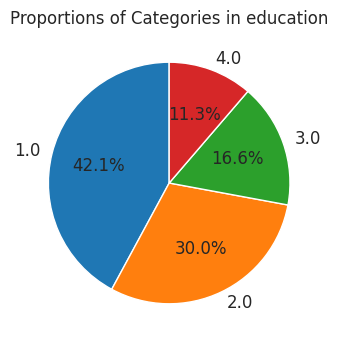

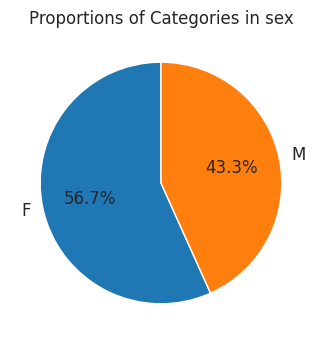

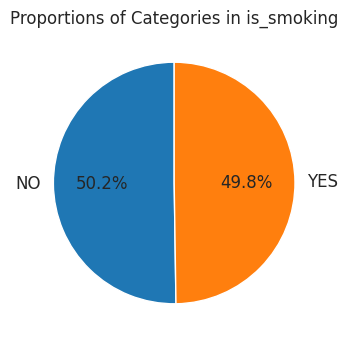

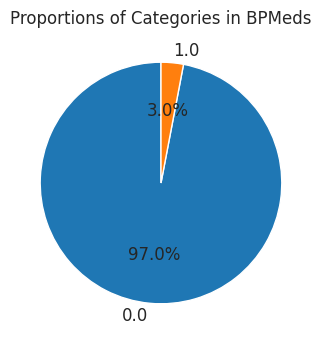

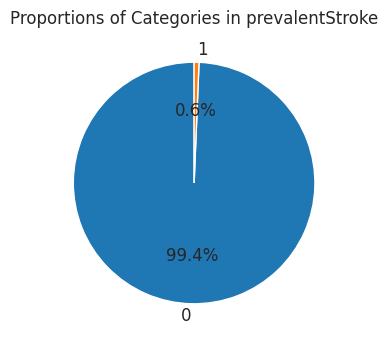

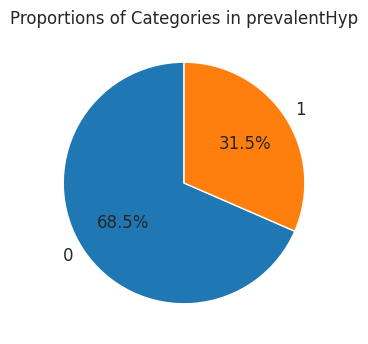

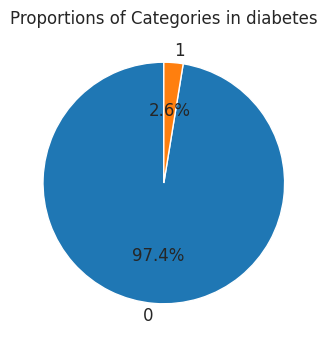

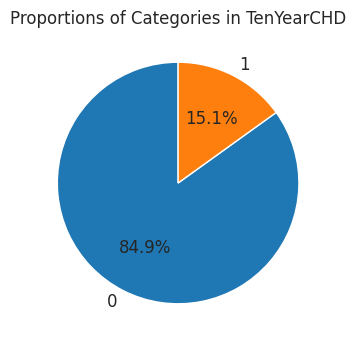

In [25]:
# Chart - 1 visualization code
list_of_variables=['education', 'sex', 'is_smoking', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
for col in list_of_variables:
  counts = df[col].value_counts()
  # Plot the donut chart
  plt.pie(counts, labels=counts.index, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12})
  plt.title(f'Proportions of Categories in {col}')
  plt.show()
  


##### 1. Why did you pick the specific chart?

The above charts have been used to find the proportions of each category present in each categorical column.

##### 2. What is/are the insight(s) found from the chart?

The following insights are gained from the above charts.
* 42.1% people have education level 1, 30.0% people have education level 2, only 16.6% and 11.3% people have education levels 3 and 4, resepectively.

* In our dataset, 56.7% are females and 43.3% are males.

* Approximately half of the people don't smoke.

* And 18% people smoke 20 cigarettes per day.
* 97% people don't take BP meds.
* Only 0.6% people had earlier stroke.
* 68.5% people have prevalent hypertension and 31.5% haven't.
* Only 2.6% people have diabetes
* In our data, approximately 85% people don't have CHD and 15% people have CHD.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above insights suggest that the data is imbalanced.

#### Chart - 2 Hist Plot for Each Continuous Variables (Univariate)

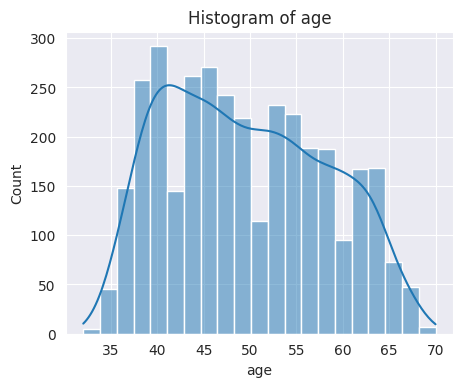

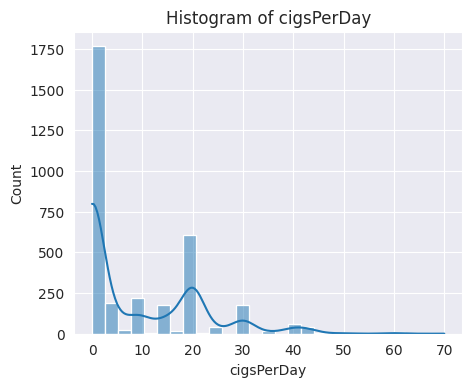

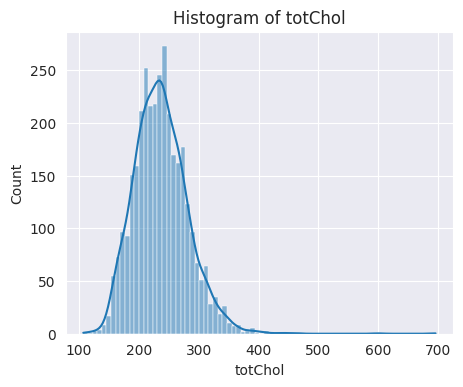

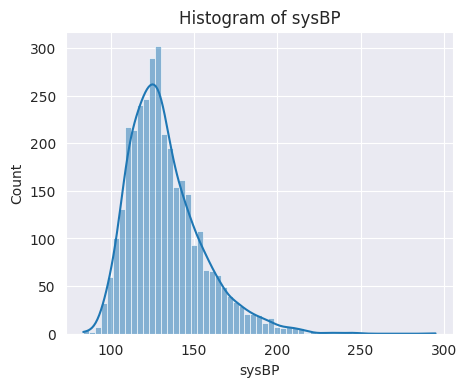

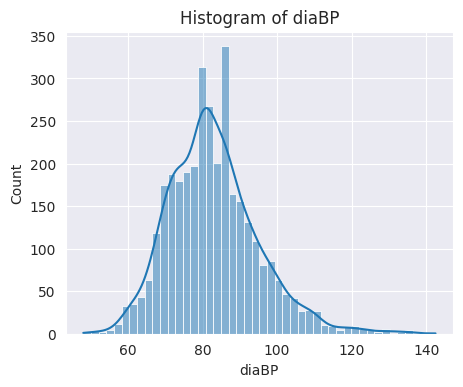

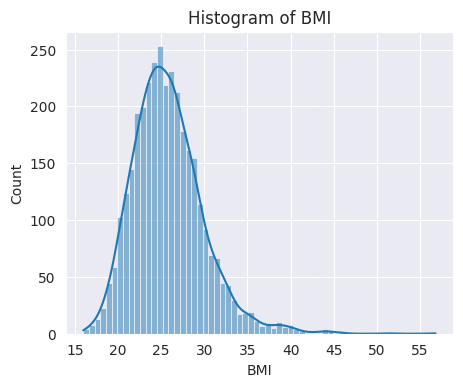

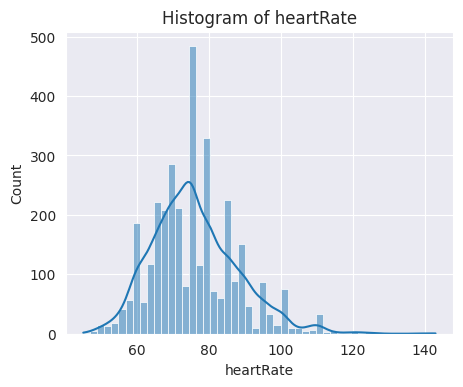

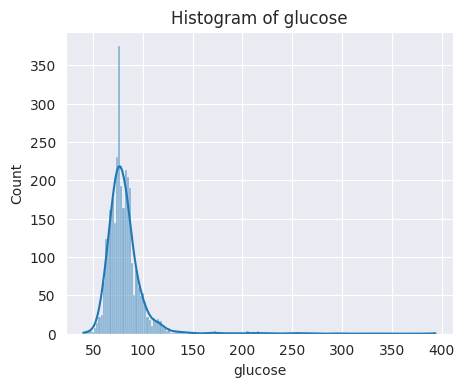

In [26]:
# Chart - 2 visualization code

# Check the distribution of each numerical columns using histogram
for col in df.describe().columns.to_list():
  if col not in ['id', 'is_smoking', 'education', 'sex', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes','TenYearCHD']:
    plt.subplots(1,1)
    ax=sns.histplot(x=df[col], kde=True)
    ax.set_title(f'Histogram of {col}')


##### 1. Why did you pick the specific chart?

The histogram are used to find the outliers in the data, check the distribution, skewness, etc. of any continuous variable present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The following insights we gained from the above plot.
* The maximum people lies between the age 37 and 55 years in the available dataset.
* Most people (approx 1750) don't smoke, and 20 cigs per day is consumed by approximately 625 people.
* Total cholestrol follows a normal distribution except there are some outliers in the data.
* Systolic BP follows an approximetly normal distribution. It has some outliers, and it shows a positive skewness (very little). 
* The diastolic BP denotes a bell curve except when diaBP is around 80.
* BMI column shows a normal distribution but it has a few outliers.
* Most people's heart rate lies between 60 and 90.
* Glucose has lot of outliers in the right so, it is a positively skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insights helps in modeling. These insights will help us in data transformation, scaling the data, etc.
From this chart, we get a lot of insights about the numerical columns, and it will lead to a good business impact (to detect the CHD at earliest).

#### Chart - 3 Bar Plot between each categorical variable and the target variable (Bivariate)

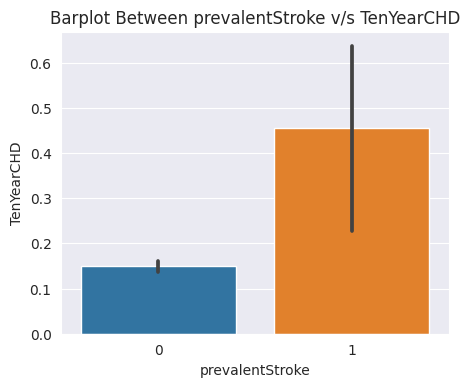

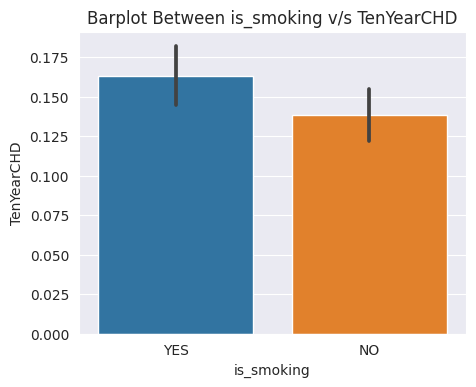

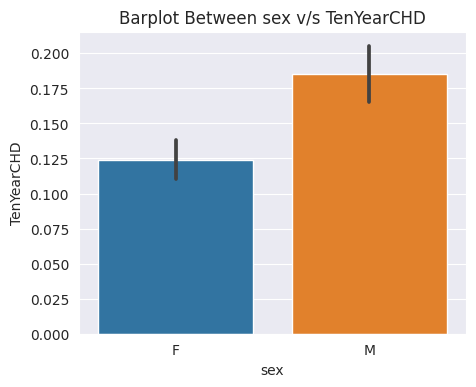

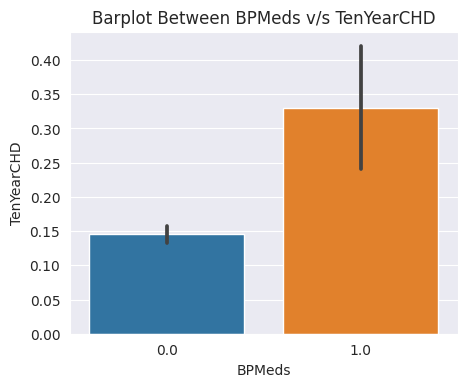

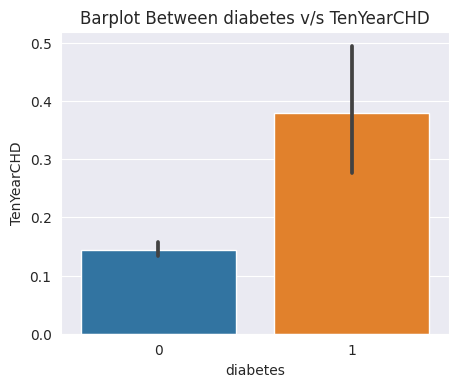

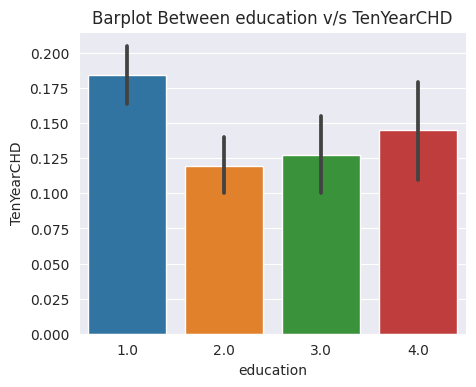

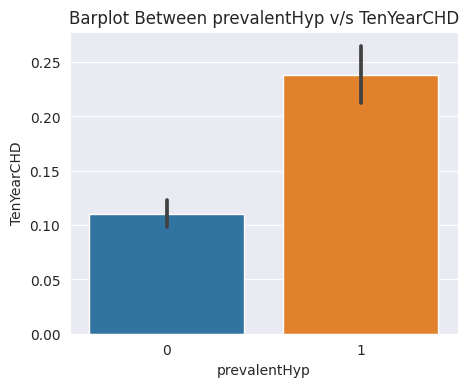

In [27]:
# Chart - 3 visualization code
# Bar plot between categorical column (containing two or four values) and the target variable
cols=list(set(df.columns)-set(['id', 'age', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose','cigsPerDay', 'TenYearCHD']))
for col in cols:                                                                           
    plt.subplots(1,1)       # Here, subplot depect one row and one column 
    ax=sns.barplot(df[col],y=df['TenYearCHD'])                                                                      
    ax.set_title(f'Barplot Between {col} v/s TenYearCHD')     # Set title for each graph
    # Add text labels to the barplot


##### 1. Why did you pick the specific chart?

To find a bar plot between the target variable and each categorical column.

##### 2. What is/are the insight(s) found from the chart?

The following insights are gained using the above plots.
* Chances of getting CHD is more if they have diabetes.

* People having education level 1 are prone to getting CHD followed by level 4, and least of level 2.

* The probability of getting CHD is more in males.

* The people who are taking BP meds are at high risk of getting CHD.

* People have high probability of getting CHD who had earlier prevalent stroke.
* People have high probability of getting CHD who had earlier prevalent hypertension.

* The probability of getting CHD is more in people who smoke compared to the people who don't.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 4 Bar plot of education level vs no of patients(bi-variate)

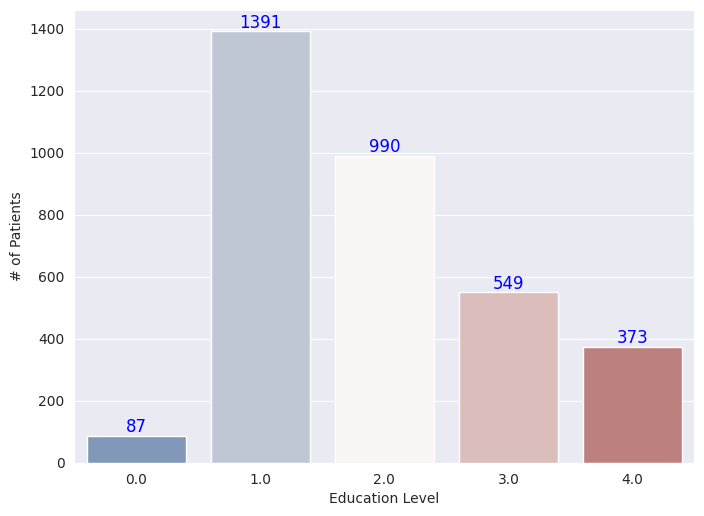

In [28]:
# Chart -4 visualization code
#Fill NA values in Education Column
edu = df.copy()
edu.education = edu.education.fillna(value=0)

#Create Figure 
fig, ax = plt.subplots(figsize = (8, 6))

#Create Plot
ax = sns.countplot (x='education', data = edu, palette= 'vlag')
ax.set(xlabel='Education Level', ylabel='# of Patients')
#ax.set_xticklabels(edu_lvl, rotation = 50)


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom')

#save plot as image
#plt.savefig(r'images/distpatients_educationlvl.png', dpi=400)


##### 1. Why did you pick the specific chart?

Bar plots are a commonly used visualization tool in data analysis and data science, and they are a key component of the matplotlib library in Python. Bar plots are important because they allow you to quickly and easily visualize and compare the values of categorical data. They are especially useful when you want to compare the frequency or distribution of different categories of data.

##### 2. What is/are the insight(s) found from the chart?

The following insights are extracted from the above bar plot chart.
* 87 people have education level 0 which means unknown education status.
* 1391 people have education level 1.
* 990 people have education level 2.
* 550 people have education level 3.
* 373 people have education level 4


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information only tells us about the number of patient present in our dataset and their education level. This varaible is generaly doesn't causes much effect on our target variable (TenYearCHD).

#### Chart - 5 Line Plot between age and TenYearCHD (Bivariate)

In [29]:
df.head(2)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   

   TenYearCHD  
0           1  
1           0

<AxesSubplot:xlabel='age', ylabel='TenYearCHD'>

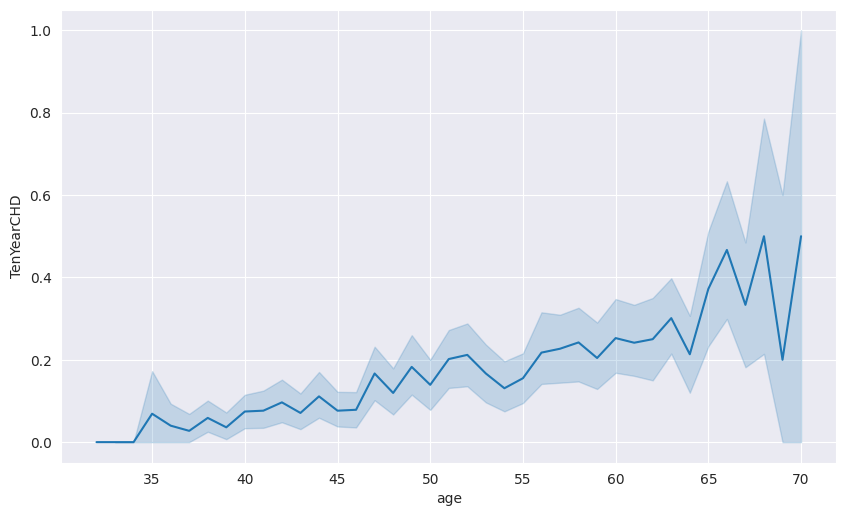

In [30]:
# Chart -5 visualization code
#Writing a code for plotting line plot between the target variable and age, cigsPerDay, and heartRate
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y="TenYearCHD", data=df)


##### 1. Why did you pick the specific chart?

To check the linear relationship between age and target variable (TenYearCHD).

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clearly visible that the chances of getting CHD is proportional to the age. So, if a person is aged he has high risk of getting CHD and vice-versa.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will definitely help in predicting CHD because the target variable and age are possitively correlated.

#### Chart - 6 Bar Plot between BMI and TenYearCHD (Bivariate)

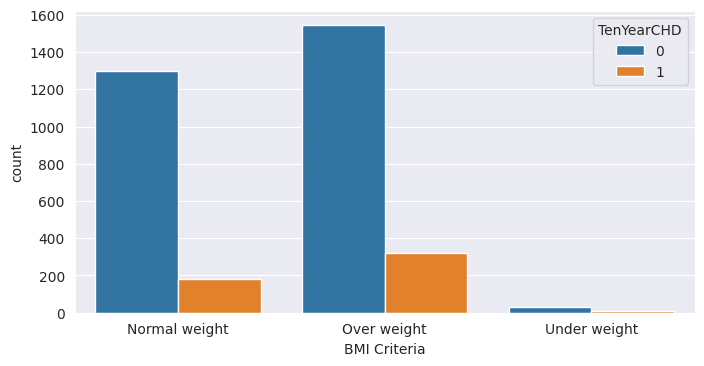

In [31]:
# Chart -6 visualization code
df_vis=df.copy()
df_vis['BMI Criteria'] = df['BMI'].apply(lambda x: 'Under weight' if x <=18.5 else ('Normal weight' if 18.5 < x <=24.9 else 'Over weight' ))
dfplot_count=df_vis.groupby(['BMI Criteria'])['TenYearCHD'].value_counts()
dfplot_per=df_vis.groupby(['BMI Criteria'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ma_con=pd.concat([dfplot_count,dfplot_per], axis=1, keys=['count','Risk of THD']).reset_index()
plt.figure(figsize=(8,4))
ax=sns.barplot(x=ma_con['BMI Criteria'], y=ma_con['count'],hue=ma_con['TenYearCHD'])
plt.show()


##### 1. Why did you pick the specific chart?

Bar plot are very helpful in comparison between two quantities.

##### 2. What is/are the insight(s) found from the chart?

Here in the above plot we have categorized the BMI linear data into Categorical data:


1.   BMI <= 18.5  Under Weight
2.   18.5 < BMI <=24.9 Normal Weight 
3.   BMI > 24.9 Over Weight

Here in the above plot we can see that Over Weight people are more prone to heart disease as compare to Under weight and Normal Weight.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights will definitely help the positive business impact for a healthcare industry. So, while using a ML model, this feature (BMI) will play a crucial role while predicting whether a person will get CHD or not.

#### Chart - 7 Violinplot between Heart Rate and TenYearCHD 

Text(0.5, 1.0, 'Distributions of Gender Vs heart_rate with Target class')

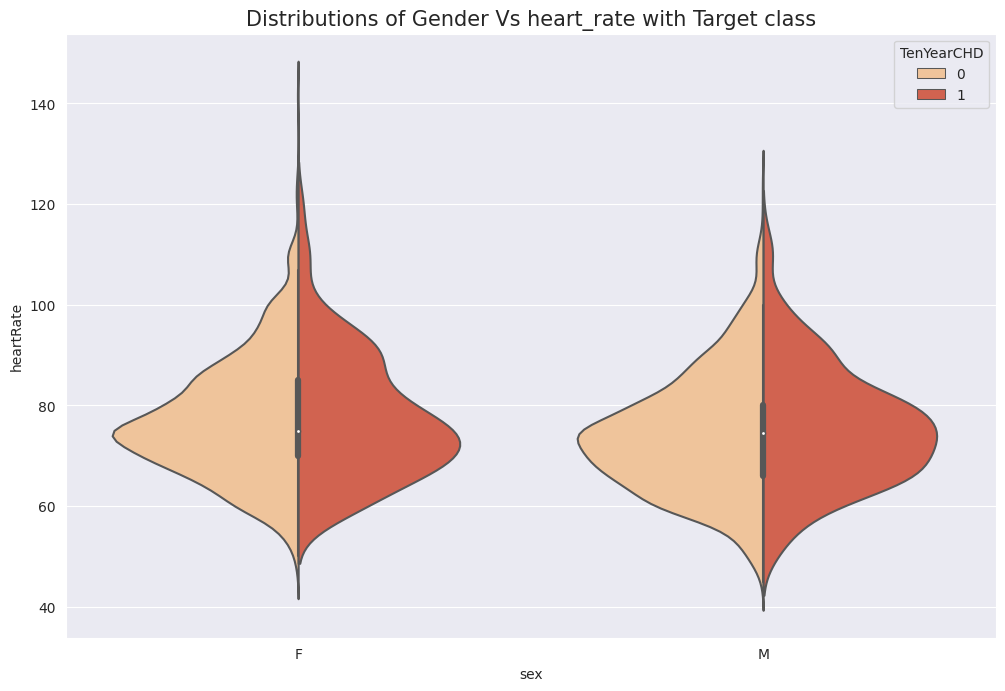

In [32]:
# Chart - 7 visualization code
# Writing code for ploting bar chart between the heartRate and TenYeaeCHD
#plotting the boxplot between Gender variable and heart_rate variable with target class.
plt.figure(figsize=(12,8))
sns.violinplot(data=df,x="sex", y='heartRate',hue="TenYearCHD",palette = 'OrRd', split=True,ax=None)
plt.title("Distributions of Gender Vs heart_rate with Target class",fontsize=15)


##### 1. Why did you pick the specific chart?

A violin plot is a data visualization technique used in data science to display the distribution and density of a continuous variable or numerical data. It is similar to a box plot but provides more information about the distribution of the data by showing the shape of the distribution.

##### 2. What is/are the insight(s) found from the chart?

 As we can see from the violin plot, females have higher heart rates than males to devolop CHD.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot helps us to conclude a relationship between the TenYearCHD and heart rate and sex. And it helps the healthcare industries while predicting whether a person will get a CHD or not.

#### Chart - 8 Line Plot between age and Cigarette per day (Bivariate)

<AxesSubplot:xlabel='age', ylabel='cigsPerDay'>

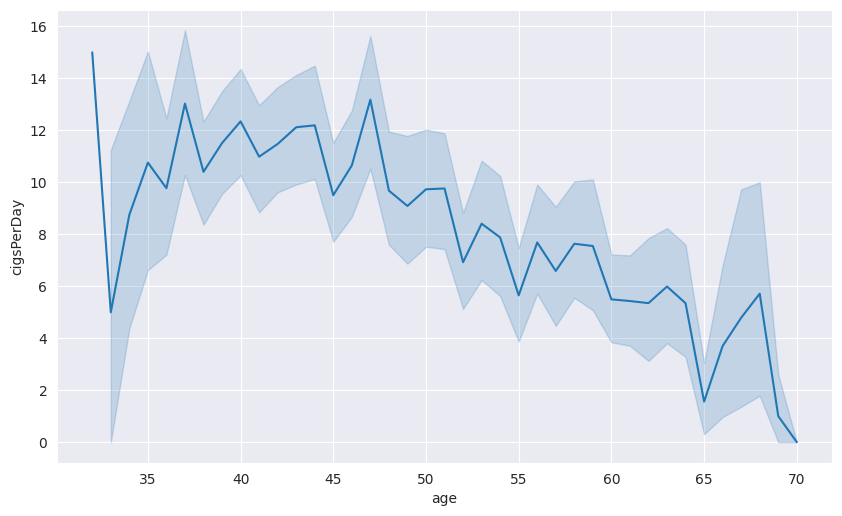

In [33]:
# Chart - 13 visualization code
#Writing a code for plotting line plot between the target variable and age, cigsPerDay, 
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y="cigsPerDay", data=df)


##### 1. Why did you pick the specific chart?

To check the linear relationship between age and cigarette per day (TenYearCHD).

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clearly visible that as the age of people increases the cigarette per day consume by people decreases.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will definitely help in predicting which age group people are consuming more cigarette per day.

#### Chart - 9 Bar Plot between the Cigarates per day and TenYearCHD considering Sex (Multivariate)

Text(0.5, 1.0, 'Bar Plot between the Cigarates per day and TenYearCHD considering Sex')

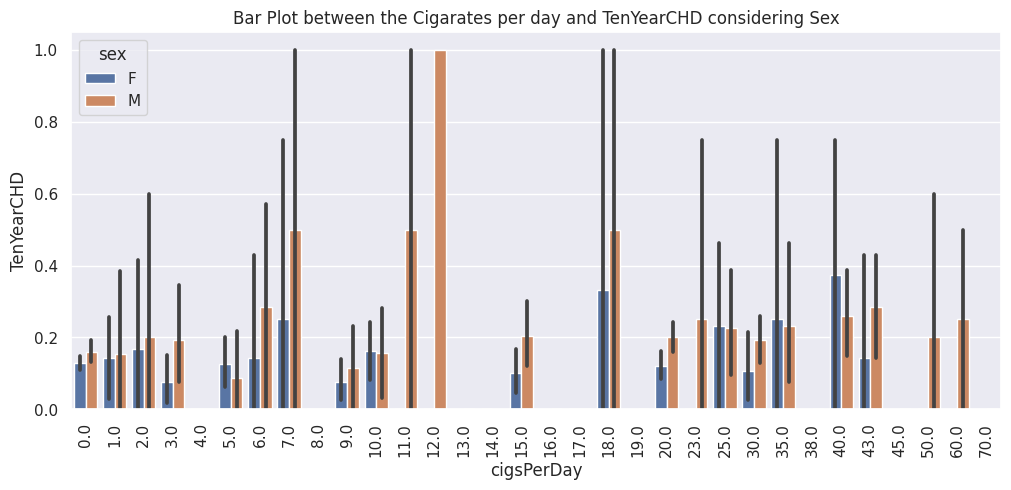

In [34]:
# Chart - 9 visualization code
sns.set(rc={"figure.figsize":(12, 5)})
ax=plt.gca()
sns.barplot(x=df['cigsPerDay'],y=df['TenYearCHD'],hue=df['sex'])
plt.xticks(rotation=90)
ax.set_title('Bar Plot between the Cigarates per day and TenYearCHD considering Sex')

##### 1. Why did you pick the specific chart?

To know about the probability of getting CHD corressponding to the number of cigarates consumed per day (on the basis of sex).

##### 2. What is/are the insight(s) found from the chart?

As we see from the plot, the probability of getting CHD is high if cigsPerDay is 11 or 12. And it is less probable if cigsPerDay is 60 or 70. So, it does not gives the clear relationship between the cigsPerDay and getting CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights is not so useful to predict CHD on the basis of cigsPerDay (Cigarettes per day).

#### Chart - 10 Bar Plot between the diabetes and Ten year CHD considering  column is_smoking (Multivariate)

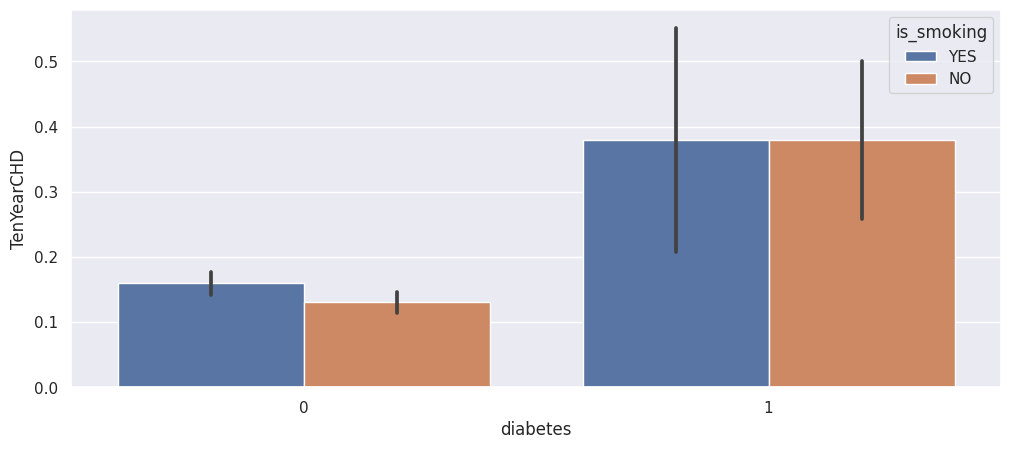

In [35]:
# Chart - 10 visualization code
# Writing a code to draw a scatterplot that depicts the relation between the diabetes and is_smoking considering Teen year CHD
sns.barplot(x=df['diabetes'], y=df['TenYearCHD'], hue=df['is_smoking'])
plt.show()

##### 1. Why did you pick the specific chart?

We use the chart to find the relationship among the diabetes,is smoking and TenYearChd

##### 2. What is/are the insight(s) found from the chart?

Here we can see that the people who are diabetic and do smoking are at high risk to heart disease and people who are only diabetic are also at high risk to heart disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By seeing this the diabetic and smoking people will get more concern about their health and take necessary steps to control diabetes and smoking.

#### Chart - 11 Bar plot between cholestrol and Ten Year CHD

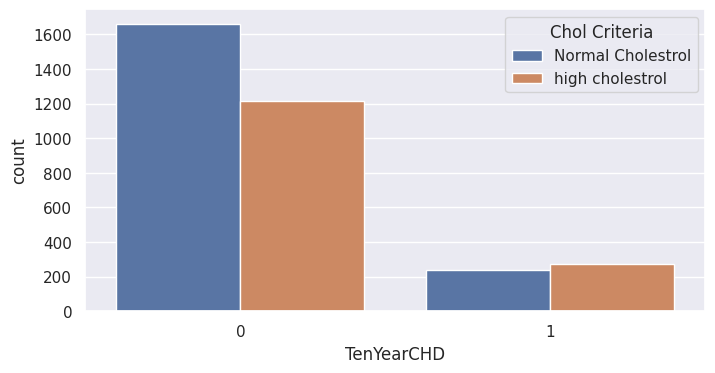

In [36]:
# Chart - 10 visualization code
df_vis=df.copy()
df_vis['Chol Criteria'] = df['totChol'].apply(lambda x: 'Normal Cholestrol' if x <=240 else 'high cholestrol' )
dfplot_count=df_vis.groupby(['Chol Criteria'])['TenYearCHD'].value_counts()
dfplot_per=df_vis.groupby(['Chol Criteria'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ma_con=pd.concat([dfplot_count,dfplot_per], axis=1, keys=['count','Risk of THD']).reset_index()
plt.figure(figsize=(8,4))
ax=sns.barplot(x=ma_con['TenYearCHD'], y=ma_con['count'],hue=ma_con['Chol Criteria'])

plt.show()

##### 1. Why did you pick the specific chart?

Here we have used bar plot which helps to compare between different variable.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can see that the persons are having high cholestrol are more prone to heart disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By seeing this the person can take necessary steps to control cholestrol level so that he can prevent heart disease.

#### Chart - 12  Bubble Chart using Age, Heart Rate, and Total Cholestrol (Multivariate)

<AxesSubplot:xlabel='prevalentHyp', ylabel='age'>

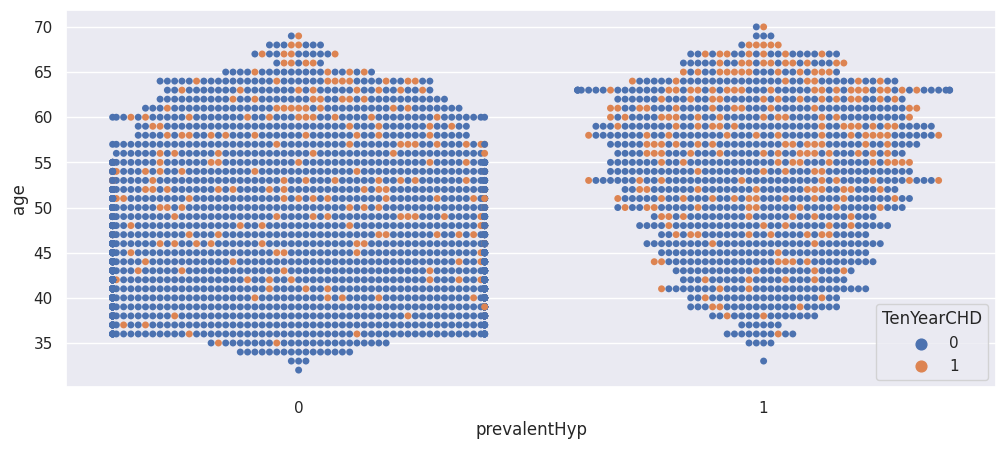

In [37]:
# Chart - 12 visualization code
sns.swarmplot(y = df['age'], x = df['prevalentHyp'],hue=df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

Here we have used swarm plot because along with the number of data points, it also provides their respective distribution.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that as the age of people increases Hypertension also increases and chances of heart diseases(TenYearCHD)also increases.
As we can also see that total CHD is highest between age 45-70 who is hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here by seeing the above plot medical industry will get an idea how the hypertension among the people increases the heart disease(Total CHD).So on the basis of that they can take necessary steps to decrease the hypertension among the people.

In [38]:
df.head(2)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   

   TenYearCHD  
0           1  
1           0

#### Chart - 13  Pending

In [39]:
# Chart - 13 visualization code


##### 1. Why did you pick the specific chart?

Here we have used swarm plot because along with the number of data points, it also provides their respective distribution.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that as the age of people increases Hypertension also increases and chances of heart diseases(TenYearCHD)also increases.
As we can also see that total CHD is highest between age 45-70 who is hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here by seeing the above plot medical industry will get an idea how the hypertension among the people increases the heart disease(Total CHD).So on the basis of that they can take necessary steps to decrease the hypertension among the people.

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

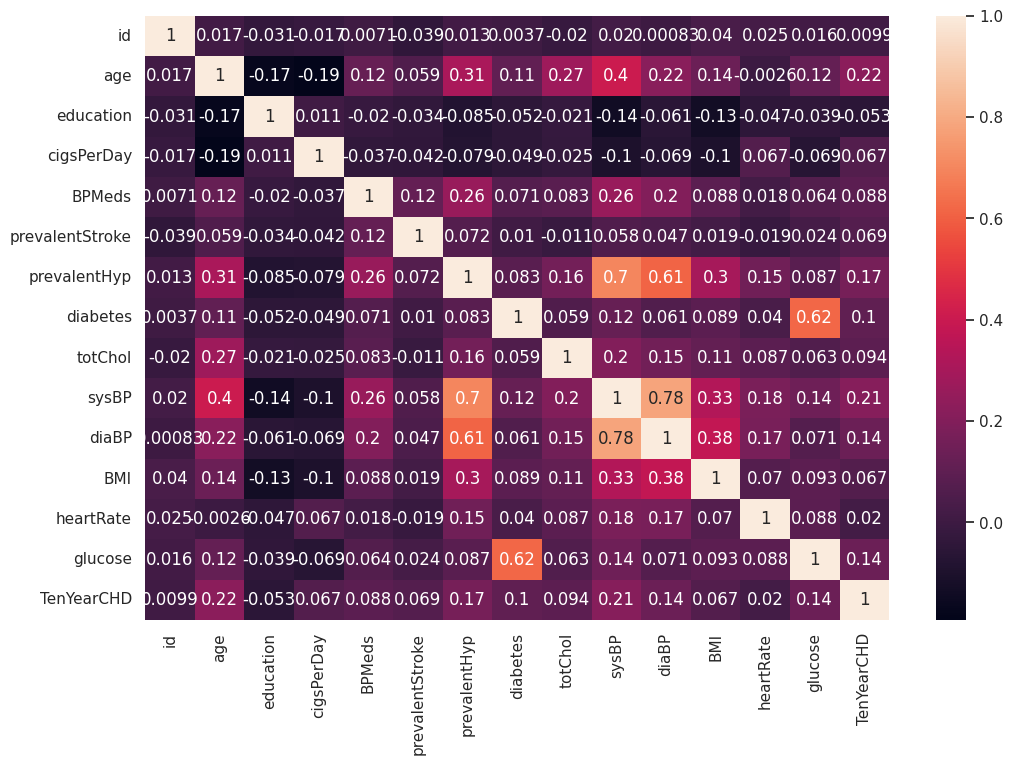

In [40]:
# Correlation Heatmap visualization code
plt.rcParams.update({'figure.figsize':(12,8),'figure.dpi':100})

sns.heatmap(df.corr(),annot=True)


##### 1. Why did you pick the specific chart?

To check the corelation between features.

##### 2. What is/are the insight(s) found from the chart?

The following insights are gained from above heatmap.
* sysBP (systolic blood pressure) and prevalent hypertension are positively 
correlated.

* diaBP (diastolic blood pressure) and prevalent hypertension are positively 
correlated.
* glucose and diabetes are positively correlated.

* diaBP and sysBP are highly (positive) correlation.
* BMI shows a positive correlation with diaBP and sysBP.

#### Chart - 15 - Pair Plot 

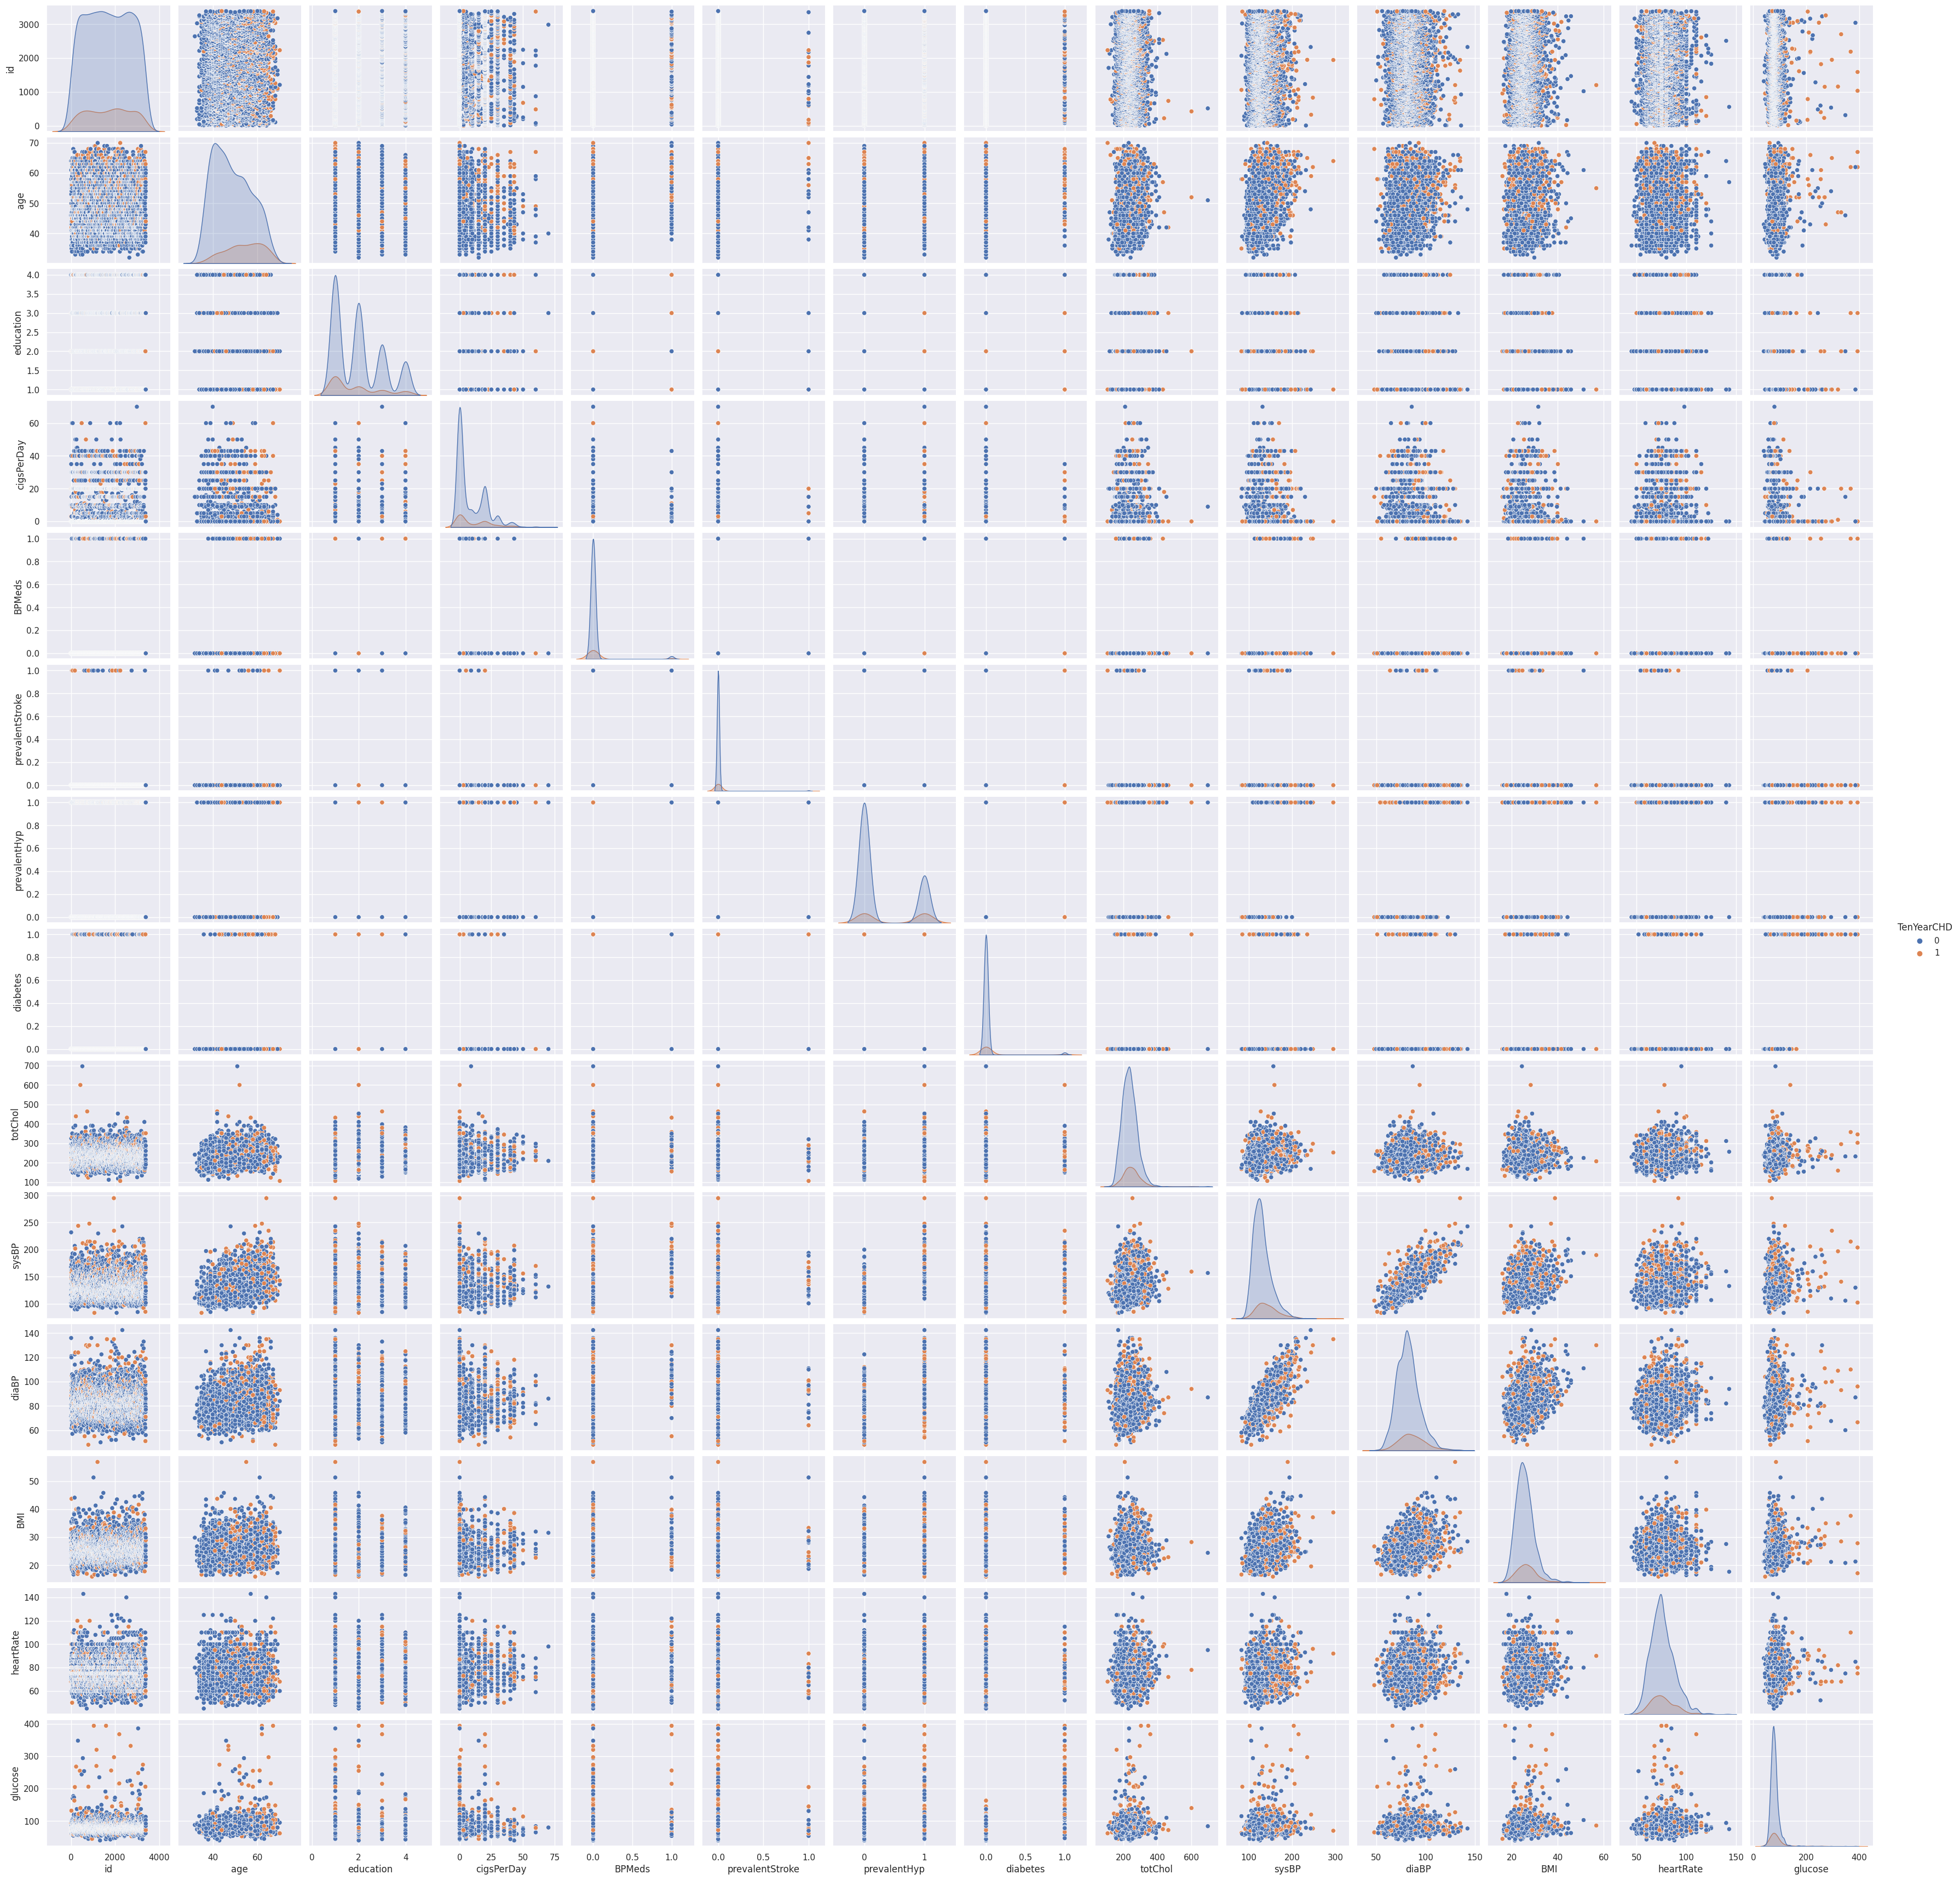

In [41]:
from seaborn.axisgrid import pairplot
# Pair Plot visualization code
# sns.pairplot(df)
# plt.show()

sns.pairplot(df, hue="TenYearCHD")

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.- Patient have common risk for devoloping CHD

2.- There is no relation between the features and devoloping CHD

3.-

### Hypothetical Statement - 1:T-test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups.The t-test is typically used when the sample size is small, or when the population standard deviation is unknown. There are several types of t-tests, including the Student's t-test and the Welch's t-test, which are used for different types of data and research questions.

Ho: On average, Patients have the common risk of devoloping heart disease

Ha:  On average, Patients have not the common risk of devoloping heart disease




#### 2. Perform an appropriate statistical test.

In [42]:
import scipy #importing library

In [43]:
# Perform Statistical Test to obtain P-Value
def ttest(col1, col2, varname ):
    t, p = scipy.stats.ttest_ind(col1,col2)
    #print('t=%.2f, p=%.30f' % (t, p))
    print("ttest_ind:               t = %g  p = %g" % (t, p))

    if p > 0.05:
       print('fail to reject null hypothesis', varname, 'has no effect on  devoloping CHD')
    else:
       print('reject null hypothesis' , varname, 'has impact on risk of devoloping CHD')



In [44]:
#Defining data variables 
CHD = df[df.TenYearCHD == 0]
NoCHD = df[df.TenYearCHD == 1]

In [45]:
ttest(CHD.age,NoCHD.age,"Age")

ttest_ind:               t = -13.4365  p = 3.86915e-40
reject null hypothesis Age has impact on risk of devoloping CHD


In [46]:
#effect of cigssperday
ttest(CHD.cigsPerDay,NoCHD.cigsPerDay,"cigsPerDay")

ttest_ind:               t = nan  p = nan
reject null hypothesis cigsPerDay has impact on risk of devoloping CHD


In [47]:
ttest(CHD.diabetes,NoCHD.diabetes,"Diabetes")

ttest_ind:               t = -6.0676  p = 1.44156e-09
reject null hypothesis Diabetes has impact on risk of devoloping CHD


##### Which statistical test have you done to obtain P-Value?

A hypothesis t-test is a statistical test used to determine whether there is enough evidence to support a claim about a population mean. The test is based on a sample from the population, and uses the sample mean and standard deviation to estimate the population mean and standard deviation

##### Why did you choose the specific statistical test?

A t-test is used to determine whether there is enough evidence to support a claim about a population mean. The test is based on a sample from the population, and uses the sample mean and standard deviation to estimate the population mean and standard deviation.

### Hypothetical Statement - 2 : chi squared test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The chi-squared test is a statistical test used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories. It is commonly used to determine if there is a significant association between two categorical variables.

Ho = There's no relation between features and devoloping CHD

Ha = both are related to each other 

#### 2. Perform an appropriate statistical test.

In [48]:
from scipy.stats import chi2_contingency

In [49]:
# Perform Statistical Test to obtain P-Value
def chi2_test(col1, col2, varname):
  contingency_data = pd.crosstab(col1, col2)
  stat, p, dof, expected = chi2_contingency(contingency_data)
  print("Chi-Square Value: " + stat.astype(str))
  print("P Value: " + p.astype(str))
  if p > 0.05:
     print('fail to reject null hypothesis', varname, 'has no effect on  devoloping CHD')
  else:
     print('reject null hypothesis' , varname, 'has impact on risk of devoloping CHD')


In [50]:
chi2_test(df.education, df.TenYearCHD, "gender")

Chi-Square Value: 22.16105229004903
P Value: 6.038646749234552e-05
reject null hypothesis gender has impact on risk of devoloping CHD


In [51]:
chi2_test(df.BPMeds, df.TenYearCHD, "BPMeds")

Chi-Square Value: 24.497970055393846
P Value: 7.438816815316195e-07
reject null hypothesis BPMeds has impact on risk of devoloping CHD


In [52]:
chi2_test(df.is_smoking, df.TenYearCHD, "Smoking")

Chi-Square Value: 3.763250993795598
P Value: 0.05239062274853224
fail to reject null hypothesis Smoking has no effect on  devoloping CHD


##### Which statistical test have you done to obtain P-Value?

The chi-squared test-The test is based on the chi-squared distribution, and the p-value obtained from the test can be used to determine the significance of the difference between the observed and expected frequencies.

##### Why did you choose the specific statistical test?

The chi-squared test is used in hypothesis testing to determine if there is a significant difference between the expected frequencies and the observed frequencies in one or more categorical variables. It is used to test the goodness of fit of a theoretical distribution to a set of data, or to test for independence between two categorical variables in a contingency table.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [53]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [54]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [55]:
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


Treatment of **education** feature

In [56]:
#Hence, the education is a categorical column so, we replace the missing value in education column with mode. So, check the mode

df.education.mode()[0]

1.0

In [57]:
df.education.fillna(df.education.mode()[0],inplace=True)


In [58]:
df.education.unique()

array([2., 4., 1., 3.])

Treatment of **CigsPerDay** feature

<AxesSubplot:ylabel='Density'>

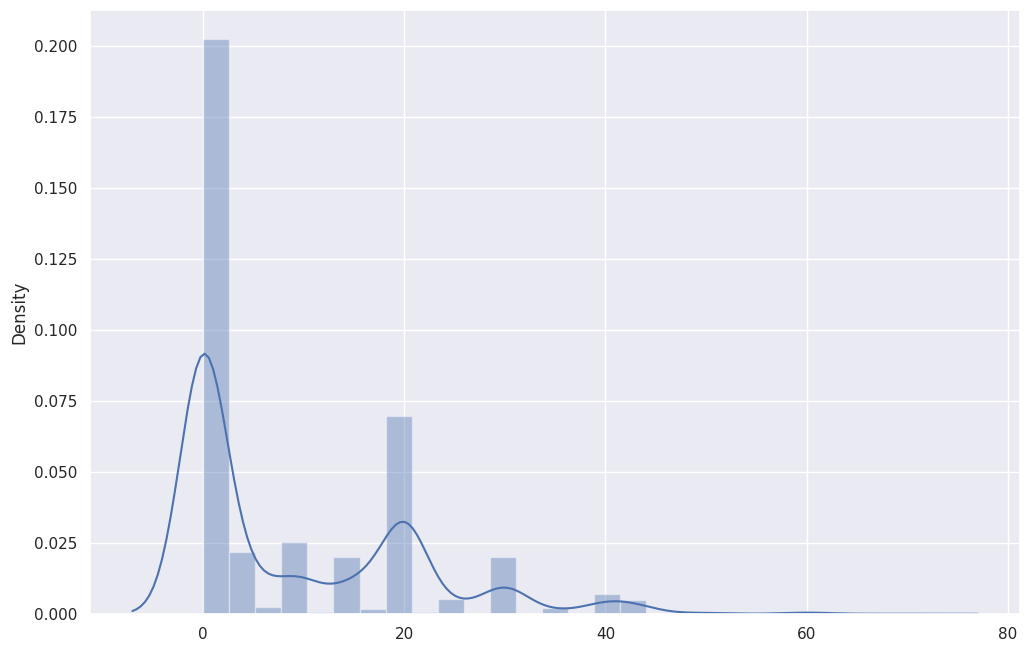

In [59]:
sns.distplot(x=df.cigsPerDay)

In [60]:
df.cigsPerDay.mode()[0]

0.0

In [61]:
df.cigsPerDay.fillna(df.cigsPerDay.mode()[0],inplace=True)

In [62]:
df['cigsPerDay'].describe()

count    3390.000000
mean        9.010619
std        11.862839
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

Treatment of **BPMeds** column

In [63]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [64]:
df.BPMeds.fillna(df.BPMeds.mode()[0], inplace=True)

Treatment of **heartRate** column

<AxesSubplot:ylabel='Density'>

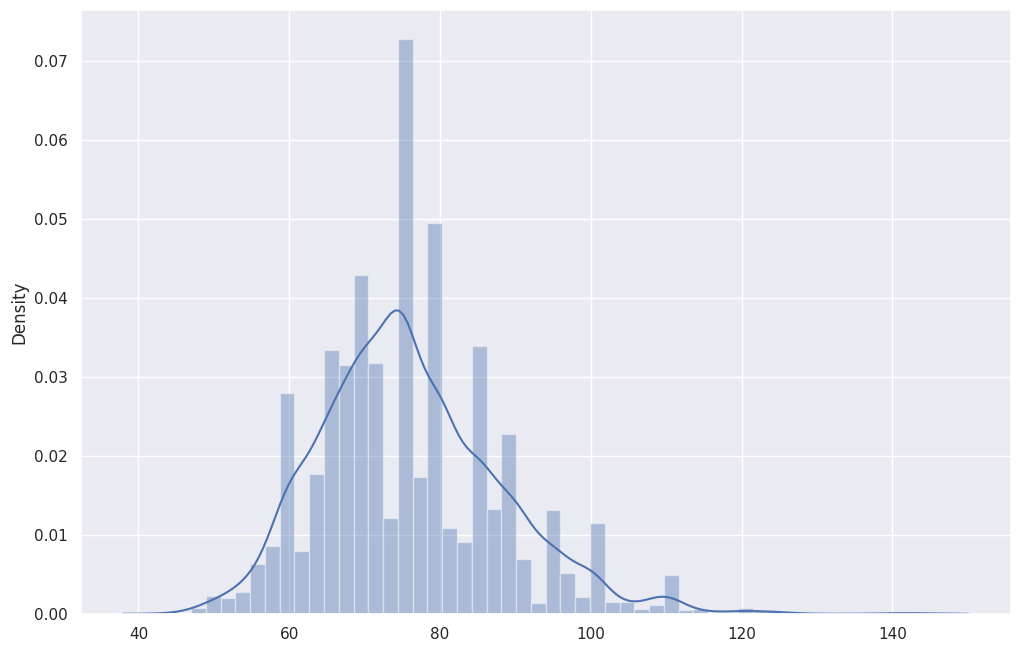

In [65]:
sns.distplot(x=df.heartRate) # plot the density plot of heartRate to check its distribution

In [66]:
df['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [67]:
df.heartRate.median()

75.0

In [68]:
df.heartRate.mode()

0    75.0
dtype: float64

In [69]:
df.heartRate.mean()

75.97727943346119

In [70]:
df.heartRate.median()

75.0

In [71]:
# Replace the null value with median (or mode or mean because they are all equal)
df.heartRate.fillna(df.heartRate.median(),inplace=True) 

Treatment of **totChol**

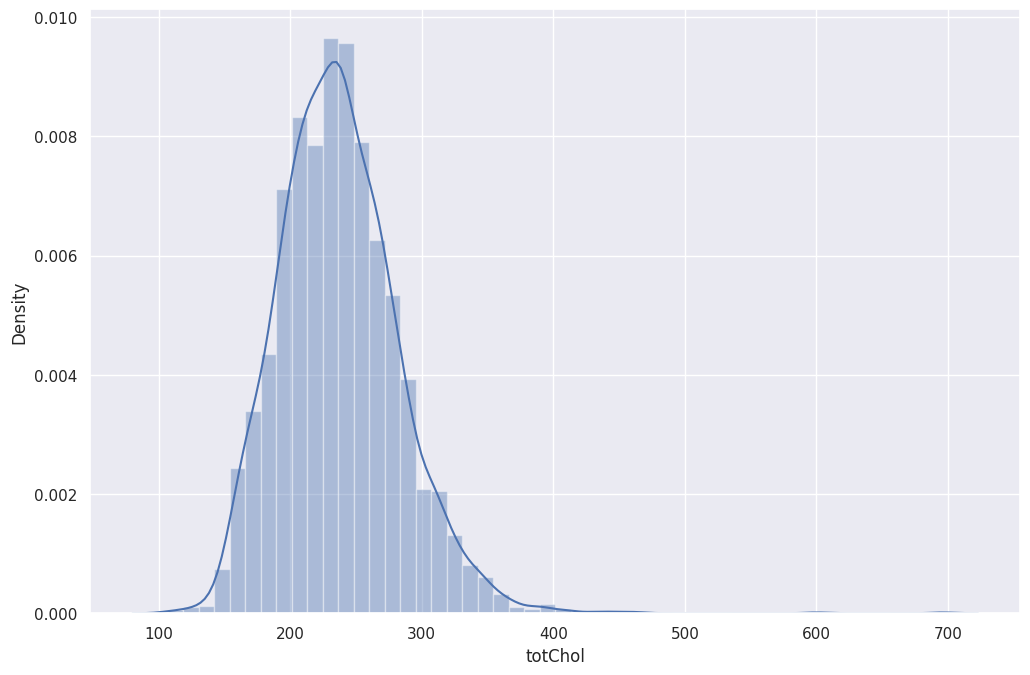

In [72]:
ax=sns.distplot(df.totChol,kde=True)


In [73]:
df.totChol.describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [74]:
df.totChol.mode()

0    240.0
dtype: float64

In [75]:
df.totChol.median()

234.0

In [76]:
df.totChol.fillna(df.totChol.median(),inplace=True) #Here the totChol shows a positive skew data so, replace the null value with median

Treatment of **glucose** column

<AxesSubplot:ylabel='Density'>

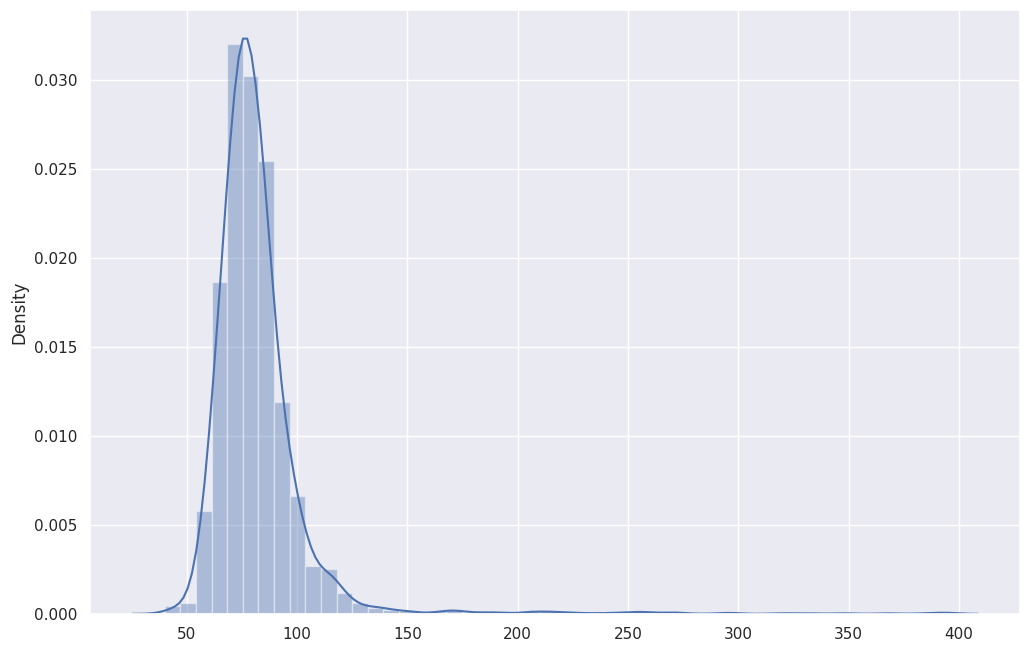

In [77]:
sns.distplot(x=df.glucose, kde=True)

In [78]:
df.glucose.describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

The above density plot shows the distribution is slightly positive skewed. So, replace the null value with median.

In [79]:
df.glucose.fillna(df.glucose.median(), inplace=True)

Treatment of **BMI** column

<AxesSubplot:ylabel='Density'>

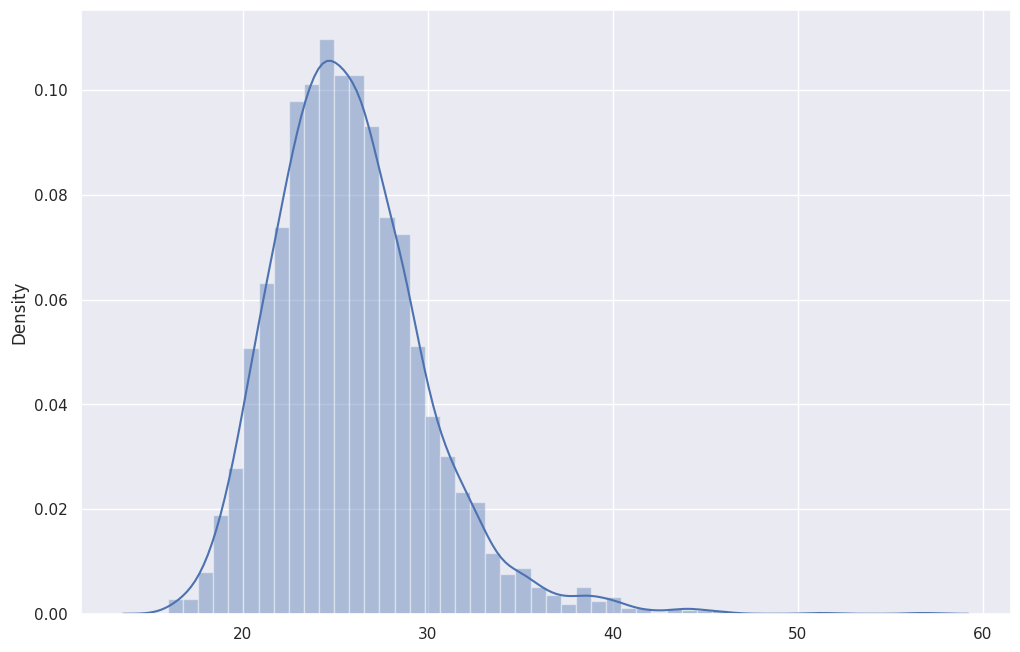

In [80]:
sns.distplot(x=df.BMI)

In [81]:
df.BMI.fillna(df.BMI.median(),inplace=True) # Here, BMI feature shows that its distribiution is slightly skewed so, replace null value with median

In [82]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

In **education** column, the null values are replaced by mode because this column is categorical.

In **cigsPerDay** feature, the missing values are treated using mode because it contains a fixed number of integers.

In **BPMeds**, the null values are treated using the mode (which is 0) because lots of people are not on the blood pressure medication.

The **totChol** column represents a numerical column so, we replaced the null values with median because the distribution is slightly positive skewed.

The column **glucode**, we treat missing value with median because it shows a numerical column.

In **BMI** column, we replace the missing value with median because it is a numerical column.
The **heartRate** column has only one null value, and its mode, median, and mean are approximately equal. So, we can treat with any of these three parameters.

### 2. Handling Outliers

In [83]:
# Handling Outliers & Outlier treatments

In [84]:
df.describe().columns.to_list()

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

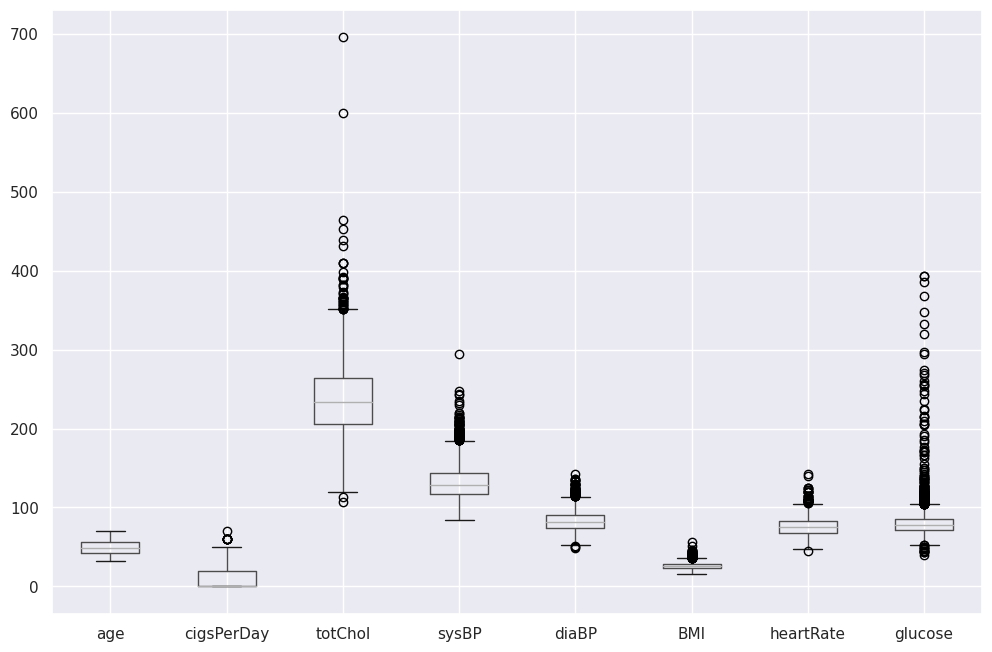

In [85]:
# for col in df.describe().columns.to_list():
#   plt.subplots(1,1)
#   ax=sns.boxplot(y=df[col])
#   ax.set_title(f'The boxplot of {col}')
box_df=df[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
box_df.boxplot()
plt.rcParams.update({'figure.figsize':(12,10),'figure.dpi':100})

In [86]:
dff = df.copy()
dff

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     0.0   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0  25.38   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [87]:
'''def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.05,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

#final_df=cap_data(df[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])'''

'def cap_data(df):\n    for col in df.columns:\n        print("capping the ",col)\n        if (((df[col].dtype)==\'float64\') | ((df[col].dtype)==\'int64\')):\n            percentiles = df[col].quantile([0.05,0.95]).values\n            df[col][df[col] <= percentiles[0]] = percentiles[0]\n            df[col][df[col] >= percentiles[1]] = percentiles[1]\n        else:\n            df[col]=df[col]\n    return df\n\n#final_df=cap_data(df[[ \'age\',\'cigsPerDay\',\'totChol\', \'sysBP\', \'diaBP\', \'BMI\', \'heartRate\', \'glucose\']])'

In [88]:
#cap_data(df[['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])

In [89]:
def cap_outliers(df, columns, lower_threshold, upper_threshold):
    for col in columns:
        lower_cap = df[col].quantile(lower_threshold)
        upper_cap = df[col].quantile(upper_threshold)
        df[col] = df[col].clip(lower_cap, upper_cap)
    return df

columns_to_cap = ['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
capped_df = cap_outliers(df, columns_to_cap, lower_threshold=0.05, upper_threshold=0.95)


In [90]:
df.cigsPerDay.describe()

count    3390.000000
mean        8.512389
std        10.585444
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        30.000000
Name: cigsPerDay, dtype: float64

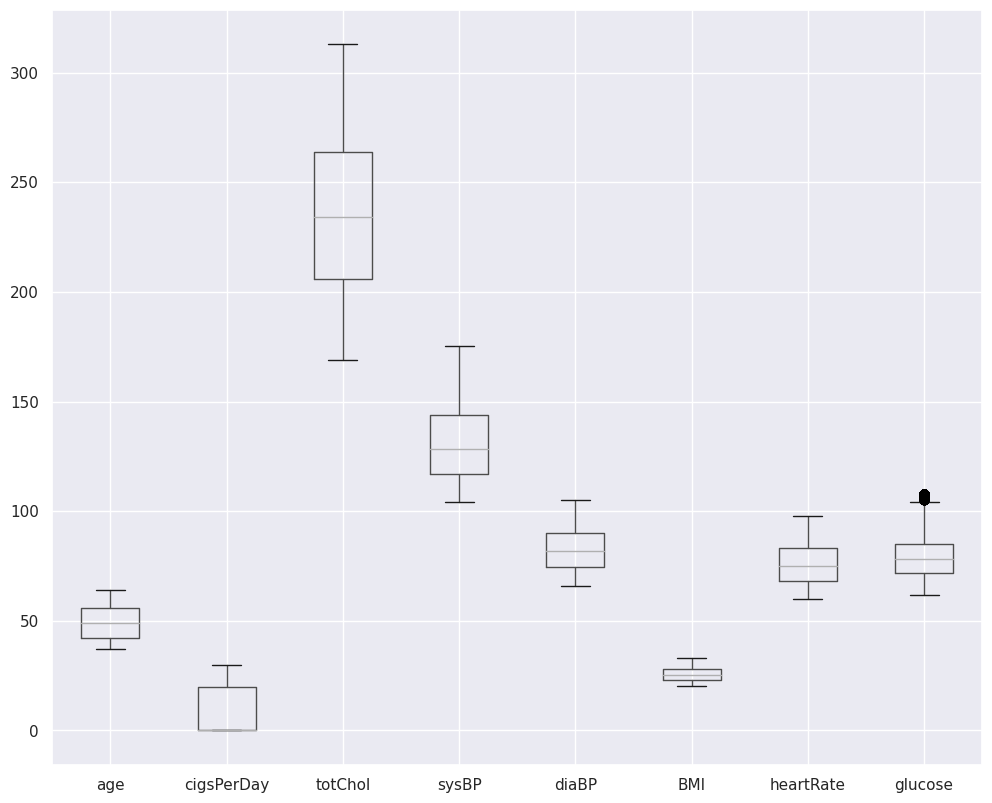

In [91]:
box_df=df[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
box_df.boxplot()
plt.rcParams.update({'figure.figsize':(12,10),'figure.dpi':100})

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [92]:
# Encode your categorical columns

In [93]:
categorical_col=set(list(df.columns))-set(list(df.describe().columns.to_list()))
categorical_col

{'is_smoking', 'sex'}

In [94]:
df.is_smoking.unique()

array(['YES', 'NO'], dtype=object)

In [95]:
df.sex.unique()

array(['F', 'M'], dtype=object)

In [96]:
#np.where(condition, x, y)

df["sex"] = np.where(df.sex=='M', 1, 0)
df["is_smoking"] = np.where(df.is_smoking=='YES',1,0)

In [97]:
df['sex'].describe()

count    3390.000000
mean        0.432743
std         0.495529
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [98]:
df.drop(['id'],axis=1, inplace=True)

In [99]:
df.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0  64.0        2.0    0           1         3.0     0.0                0   
1  37.0        4.0    1           0         0.0     0.0                0   
2  46.0        1.0    0           1        10.0     0.0                0   
3  50.0        1.0    1           1        20.0     0.0                0   
4  64.0        1.0    0           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

#### What all categorical encoding techniques have you used & why did you use those techniques?

There are two categorical columns in dataset i.e 'sex' and 'is_smoking'. I used binary encoding to treat these columns.
If sex="M", it is replaced with 1 else zero. If 'is_smoking'='YES' it is encoded as 1 else 0.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [100]:
# Manipulate Features to minimize feature correlation and create new features
def read_blood_pressure(df):
    # Create new column to store the hypertension category
    df['hypertension_category'] = None
    # Iterate over each row in the dataframe
    for i, row in df.iterrows():
        # Get the systolic and diastolic values from the dataframe rows
        systolic = row['sysBP']
        diastolic = row['diaBP']
        # Check for hypertension category
        if systolic < 120 and diastolic < 80:
            df.loc[i, 'hypertension_category'] = 'normalBP'
        elif systolic >= 120 and systolic < 129 and diastolic < 80:
            df.loc[i, 'hypertension_category'] = 'elevatedBP'
        elif (systolic >= 130 and systolic < 139) or (diastolic >= 80 and diastolic < 89):
            df.loc[i, 'hypertension_category'] = 'stage1_hypertension'
        elif (systolic >= 140 and systolic < 179) or (diastolic >= 90 and diastolic < 119):
            df.loc[i, 'hypertension_category'] = 'stage2_hypertension'
        else:
            df.loc[i, 'hypertension_category'] = 'critical'
    return df


In [101]:
read_blood_pressure(df)

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0     64.0        2.0    0           1         3.0     0.0                0   
1     37.0        4.0    1           0         0.0     0.0                0   
2     46.0        1.0    0           1        10.0     0.0                0   
3     50.0        1.0    1           1        20.0     0.0                0   
4     64.0        1.0    0           1        30.0     0.0                0   
...    ...        ...  ...         ...         ...     ...              ...   
3385  60.0        1.0    0           0         0.0     0.0                0   
3386  46.0        1.0    0           0         0.0     0.0                0   
3387  44.0        3.0    1           1         3.0     0.0                0   
3388  60.0        1.0    1           0         0.0     0.0                0   
3389  54.0        3.0    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.38       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  104.0   66.0  21.96       80.0   
3387             1         0    313.0  164.0  105.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD hypertension_category  
0        80.0           1   stage1_hypertension  
1        75.0           0   stage2_hypertension  
2        94.0           0              normalBP  
3        94.0           1   stage1_hypertension  
4        77.0           0   stage1_hypertension  
...       ...         ...                   ...  
3385    103.0           0            elevatedBP  
3386     84.0           0              normalBP  
3387     72.0           1   stage2_hypertension  
3388     85.0           0   stage2_hypertension  
3389     92.0           0            elevatedBP  

[3390 rows x 17 columns]

In [102]:
# now convert bp variables into number
def encode_bp(df):
    df['hypertension_category'] = df['hypertension_category'].apply(lambda x: 1 if x == 'normalBP' else (2 if x == 'elevatedBP' else (3 if x == 'stage1_hypertension' else (4 if x == 'stage2_hypertension' else (5 if x == 'critical' else x)))))
    return df


In [103]:
encode_bp(df)

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0     64.0        2.0    0           1         3.0     0.0                0   
1     37.0        4.0    1           0         0.0     0.0                0   
2     46.0        1.0    0           1        10.0     0.0                0   
3     50.0        1.0    1           1        20.0     0.0                0   
4     64.0        1.0    0           1        30.0     0.0                0   
...    ...        ...  ...         ...         ...     ...              ...   
3385  60.0        1.0    0           0         0.0     0.0                0   
3386  46.0        1.0    0           0         0.0     0.0                0   
3387  44.0        3.0    1           1         3.0     0.0                0   
3388  60.0        1.0    1           0         0.0     0.0                0   
3389  54.0        3.0    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.38       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  104.0   66.0  21.96       80.0   
3387             1         0    313.0  164.0  105.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  hypertension_category  
0        80.0           1                      3  
1        75.0           0                      4  
2        94.0           0                      1  
3        94.0           1                      3  
4        77.0           0                      3  
...       ...         ...                    ...  
3385    103.0           0                      2  
3386     84.0           0                      1  
3387     72.0           1                      4  
3388     85.0           0                      4  
3389     92.0           0                      2  

[3390 rows x 17 columns]

#### 2. Feature Selection

In [104]:
df2=df.copy()

In [105]:
df2.drop(['sysBP', 'diaBP'], axis=1, inplace=True)

since, cigs_per_day column is already having the information about smokers so we dont need is_smoking column 

In [106]:
df2.drop(["is_smoking"],axis=1,inplace=True)

<AxesSubplot:>

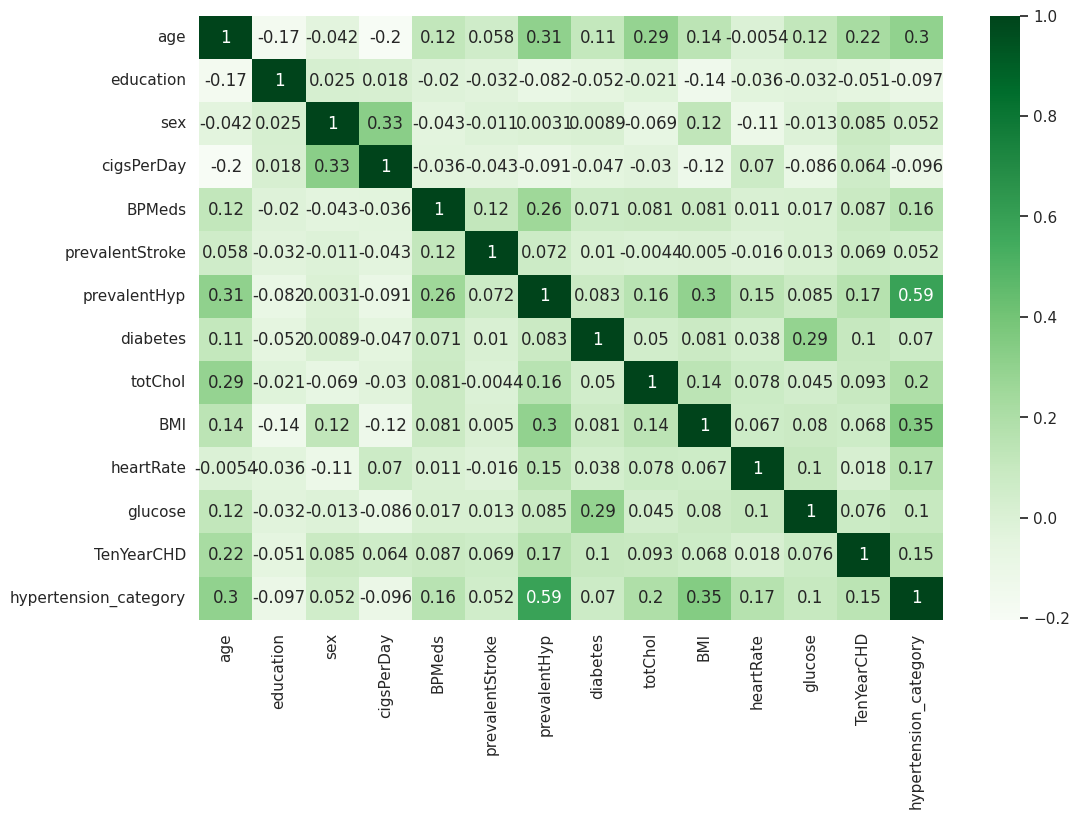

In [107]:
# Correlation Heatmap visualization code
plt.rcParams.update({'figure.figsize':(12,8),'figure.dpi':100})

sns.heatmap(df2.corr(),cmap= 'Greens',annot=True)

##### What all feature selection methods have you used  and why?

First we checked every variables through Data wrangling and Data visulisation and their relationship between them after that we select feature as per their importance how they affect to Produce CHD.
then we have removed some variables by converting them into one features in the sction of Features manupulation and also we removed some useless variable .

##### Which all features you found important and why?

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  # final_df.plot.bar(color='teal')
  return final_df

In [110]:
# Getting feature importance of selected features
randomforest_embedded(x=df2.drop(["TenYearCHD"],axis=1),y=df["TenYearCHD"])

Features  Importances
5         prevalentStroke     0.005947
7                diabetes     0.010610
4                  BPMeds     0.011009
6            prevalentHyp     0.022943
2                     sex     0.024466
12  hypertension_category     0.047605
1               education     0.049862
3              cigsPerDay     0.069399
10              heartRate     0.129291
11                glucose     0.141582
0                     age     0.151978
8                 totChol     0.162031
9                     BMI     0.173277

Finally we found out 13 indepenedent features which are affecting to devolope CHD and valdate their importances through Embedded method using random forest classifier feature importance and we can see on above graph all the features have some importance none of them are zero.

### 5. Data Transformation

In [111]:
for column in df2.columns:
    print(column)
    print(df2[column].skew())
    

age
0.19933505114565864
education
0.7352403272651097
sex
0.2716141401804689
cigsPerDay
0.7987202700140527
BPMeds
5.563972386285764
prevalentStroke
12.297612002671828
prevalentHyp
0.7951885864720627
diabetes
6.001977441386289
totChol
0.2009466755219177
BMI
0.33496376508337866
heartRate
0.3967279461624882
glucose
0.7287503478673296
TenYearCHD
1.953181703698407
hypertension_category
-0.3807787326318706


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

NO, from above skewness result we can see that our data is following gaussian distribution  

so we dont need to transform the data.

### 6. Data Scaling

In [112]:
df3=df2.copy()

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
# Scaling your data
#applying standardScaler 
scaler = StandardScaler()
columns = ['age', 'cigsPerDay', 'totChol', 'heartRate','hypertension_category', 'BMI', 'heartRate', 'glucose' ]
df3[columns] = scaler.fit_transform(df3[columns])

##### Which method have you used to scale you data and why?

StandardScaler is used to resize the distribution

StandardScaler is a pre-processing technique in machine learning and statistics used to standardize a dataset, meaning it scales the data so that it has a mean of 0 and a standard deviation of 1. This is useful because many machine learning algorithms require that the input data is in a standard scale in order to work properly.

In [115]:
df3.head(1) #checking scalled data

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  \
0  1.738547        2.0    0   -0.520829     0.0                0   

   prevalentHyp  diabetes   totChol       BMI  heartRate   glucose  \
0             0         0 -0.380748 -0.082252   1.328161  0.012189   

   TenYearCHD  hypertension_category  
0           1               0.277079

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

features or variables in a dataset while preserving the most relevant information. It involves transforming high-dimensional data into a lower-dimensional space, where it can be visualized, analyzed, and processed more efficiently.

no need to use dimensionality reduction here

becouse it is important to note that dimensionality reduction can sometimes lead to loss of information, especially if the reduced dataset retains only a small fraction of the original features. In such cases, it may be preferable to work with the original high-dimensional dataset, even if it requires more computational resources and is more challenging to visualize.

### 8. Data Splitting

In [116]:
# Split your data to train and test. Choose Splitting ratio wisely.
x, y = df3.loc[:, df3.columns != 'TenYearCHD'], df3['TenYearCHD']

In [117]:
#importing library to split
from sklearn.model_selection import train_test_split
#dividing the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0, stratify=y)
print(x_train.shape)
print(x_test.shape)

(2712, 13)
(678, 13)


##### What data splitting ratio have you used and why? 

Here we are taking the data splitting ratio is 80:20, this means that 80% of the data is used for training and 20% of the data is used for testing. This is a commonly used ratio in machine learning as it allows for a sufficient amount of data to be used for training the model, while also reserving a meaningful portion of the data for testing the model's performance on unseen data. This helps ensure that the model is able to generalize well to new, unseen data and has not overfitted to the training data.

### 9. Handling Imbalanced Dataset

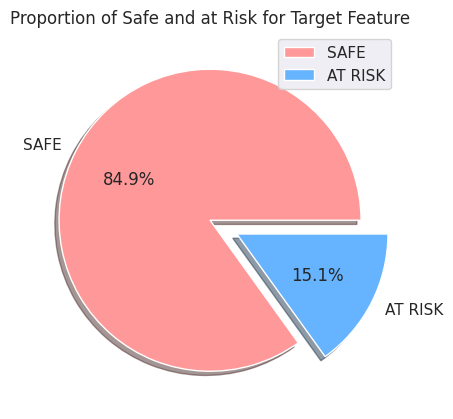

In [118]:
#lets check data is imbalanced or not
#trying to plot pie chart to show 
plt.figure(figsize=(7,5), dpi=100)
proportion = df['TenYearCHD'].value_counts()
labels = ['SAFE','AT RISK']
plt.title('Proportion of Safe and at Risk for Target Feature')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#ff9999','#66b3ff'])
plt.legend()
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

Yes as we can see our data is highly imbalanced

Majority of data points belongs to safe (no risk of devoloping CHD "0") class.

In [119]:
# Handling Imbalanced Dataset (If needed)
#importing library for handling imbalanced
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42) #creating instance

In [120]:
x_train_imbal, y_train_imbal = smote.fit_resample(x,y) #fitting predictor and target

In [121]:
x_train_imbal

age  education  sex  cigsPerDay    BPMeds  prevalentStroke  \
0     1.738547   2.000000    0   -0.520829  0.000000                0   
1    -1.502044   4.000000    1   -0.804278  0.000000                0   
2    -0.421847   1.000000    0    0.140554  0.000000                0   
3     0.058241   1.000000    1    1.085387  0.000000                0   
4     1.738547   1.000000    0    2.030220  0.000000                0   
...        ...        ...  ...         ...       ...              ...   
5753  1.341524   3.423018    1    1.830379  0.000000                0   
5754  1.188651   1.000000    0   -0.804278  0.000000                0   
5755  0.896587   1.196988    1   -0.804278  0.000000                0   
5756  0.963239   1.459721    0   -0.114682  0.459721                0   
5757  1.589979   1.000000    0    1.085387  0.000000                0   

      prevalentHyp  diabetes   totChol       BMI  heartRate   glucose  \
0                0         0 -0.380748 -0.082252   1.328161  0.012189   
1                1         0 -0.608906  1.171243  -0.361461 -0.417344   
2                0         0  0.354425 -1.518488   1.140426  1.214882   
3                1         0 -0.076539  0.740087  -0.736932  1.214882   
4                0         0  0.126268  0.214704  -0.549196 -0.245531   
...            ...       ...       ...       ...        ...       ...   
5753             1         0 -0.310493  0.424600  -0.422918  0.914274   
5754             1         0  0.733764  1.478642   1.956228  2.002067   
5755             0         0  0.538020 -0.123219  -1.487875 -0.711497   
5756             1         0  0.473855  0.114331  -0.295622  1.254375   
5757             0         0 -0.078413 -1.564487  -1.450666  1.049879   

      hypertension_category  
0                  0.277079  
1                  1.173358  
2                 -1.515477  
3                  0.277079  
4                  0.277079  
...                     ...  
5753               1.173358  
5754               1.173358  
5755              -0.619199  
5756               0.277079  
5757               0.348137  

[5758 rows x 13 columns]

In [122]:
y_train_imbal

0       1
1       0
2       0
3       1
4       0
       ..
5753    1
5754    1
5755    1
5756    1
5757    1
Name: TenYearCHD, Length: 5758, dtype: int64

In [123]:
#now lets check length of our dataset
#after and before
print("balanced data shape (resampled)" , len(x_train_imbal))
print("Original data shape" , len(x_train))

balanced data shape (resampled) 5758
Original data shape 2712


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

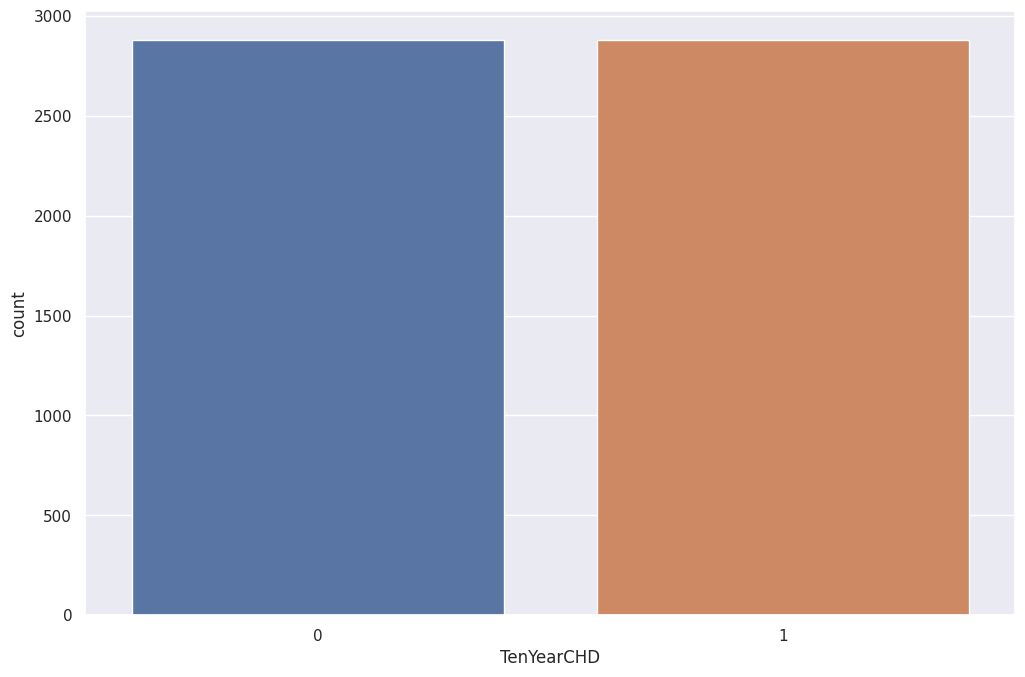

In [124]:
sns.countplot(y_train_imbal) #checking through plot

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique) is a popular method for oversampling in machine learning. It is used to balance the class distribution by generating synthetic samples for the minority class. The synthetic samples are created by interpolating between existing minority class samples. The interpolation is done by selecting two or more nearest minority class samples and taking the linear combination of their feature values. This allows for the creation of new samples that are similar to the existing minority class samples, thereby increasing the overall number of minority class samples and balancing the class distribution.

In [125]:
#again spliting data from blanced data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x_train_imbal,y_train_imbal , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4606, 13)
(1152, 13)


## ***7. ML Model Implementation***

### ML Model - 1 - **Implementing Logistic Regression**

In [126]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [127]:
# Checking the coefficients
clf.coef_

array([[ 0.67175316, -0.03670567, -0.20367296,  0.45905879,  0.47509739,
        -0.52028117, -0.20140483,  0.21041854,  0.11636448,  0.05401961,
        -0.08405689,  0.13322231,  0.38263325]])

In [128]:
# Checking the intercept value
clf.intercept_

array([-0.08268641])

In [129]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [130]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [131]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.673469387755102
The accuracy on test data is  0.6640625


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1512  814]
 [ 690 1590]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

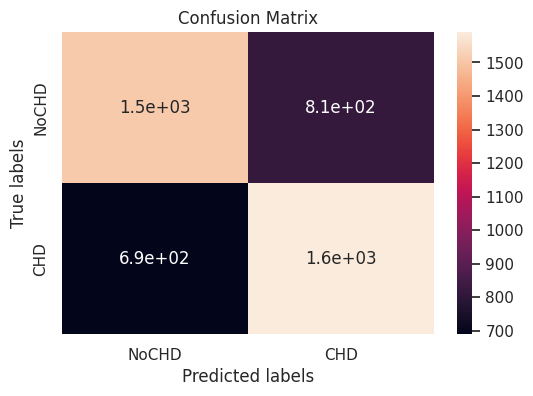

In [132]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(6,4))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[355 198]
 [189 410]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

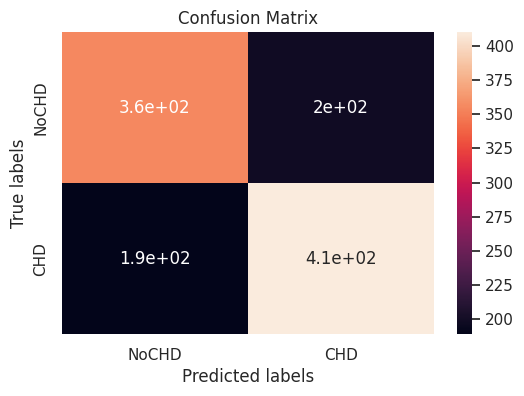

In [133]:
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

plt.figure(figsize=(6,4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [134]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2326
           1       0.66      0.70      0.68      2280

    accuracy                           0.67      4606
   macro avg       0.67      0.67      0.67      4606
weighted avg       0.67      0.67      0.67      4606

 
roc_auc_score
0.6737057066570121


In [135]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       553
           1       0.67      0.68      0.68       599

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152

 
roc_auc_score
0.6632135536321838


#### 2. Cross- Validation & Hyperparameter Tuning

In [136]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.674635 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [137]:
from sklearn.metrics import classification_report 

In [138]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [139]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2326
           1       0.66      0.70      0.68      2280

    accuracy                           0.67      4606
   macro avg       0.67      0.67      0.67      4606
weighted avg       0.67      0.67      0.67      4606

 
roc_auc_score
0.6737057066570121


In [140]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       553
           1       0.67      0.68      0.68       599

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152

 
roc_auc_score
0.6632135536321838


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

To get the best prediction results from our model, we should seek out the best hyperparameter values. However, the question of how to locate these ideal sets of hyperparameters arises. The best hyperparameters can be found by using the manual search method, which would require a lot of time to build a single model and involves a hit-and-trial approach

For this reason, methods like Random Search, GridSearch were introduced. 
GridSearchCV automates the process of tuning hyperparameters by systematically trying all possible combinations of hyperparameters specified in a grid, and then evaluating the performance of each combination using cross-validation. Cross-validation is a technique for estimating the performance of a machine learning model by splitting the data into multiple subsets and training the model on some subsets while evaluating it on others.

GridSearchCV returns the best combination of hyperparameters that result in the highest cross-validation score. Once the best hyperparameters are found, they can be used to train the model on the entire dataset and make predictions on new data.
That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, we did not find much improovement in our model after applying Hyperparameter Tuning


### ML Model - 2 - **Implementing Random Forest Classifier**

In [141]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [142]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.8932291666666666


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2326    0]
 [   0 2280]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

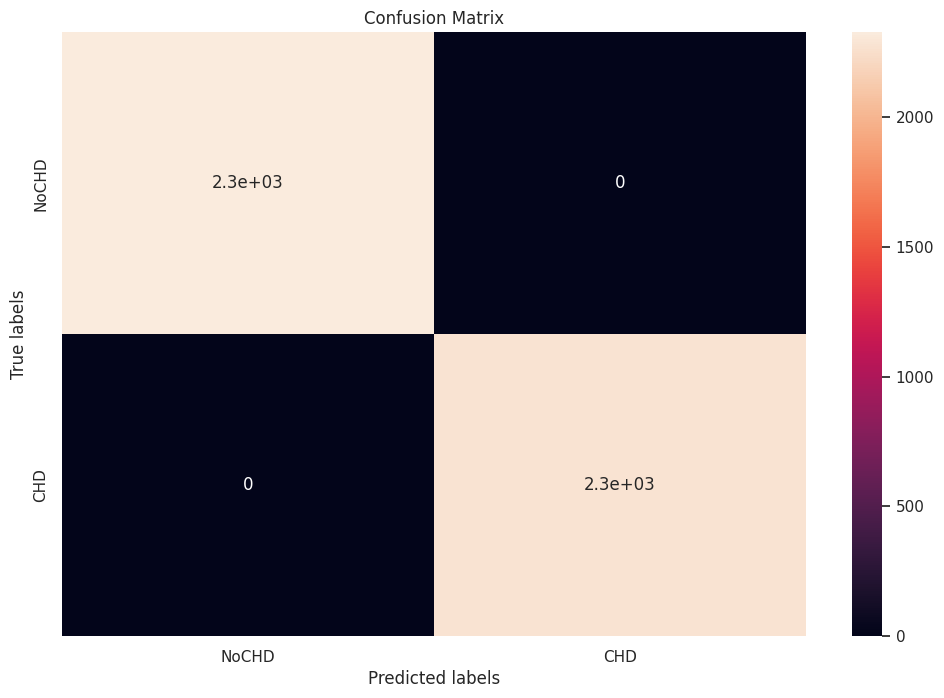

<Figure size 400x300 with 0 Axes>

In [143]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
plt.figure(figsize=(4,3))
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [144]:
y_test.value_counts()

1    599
0    553
Name: TenYearCHD, dtype: int64

In [145]:
len(test_class_preds)

1152

[[492  61]
 [ 62 537]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

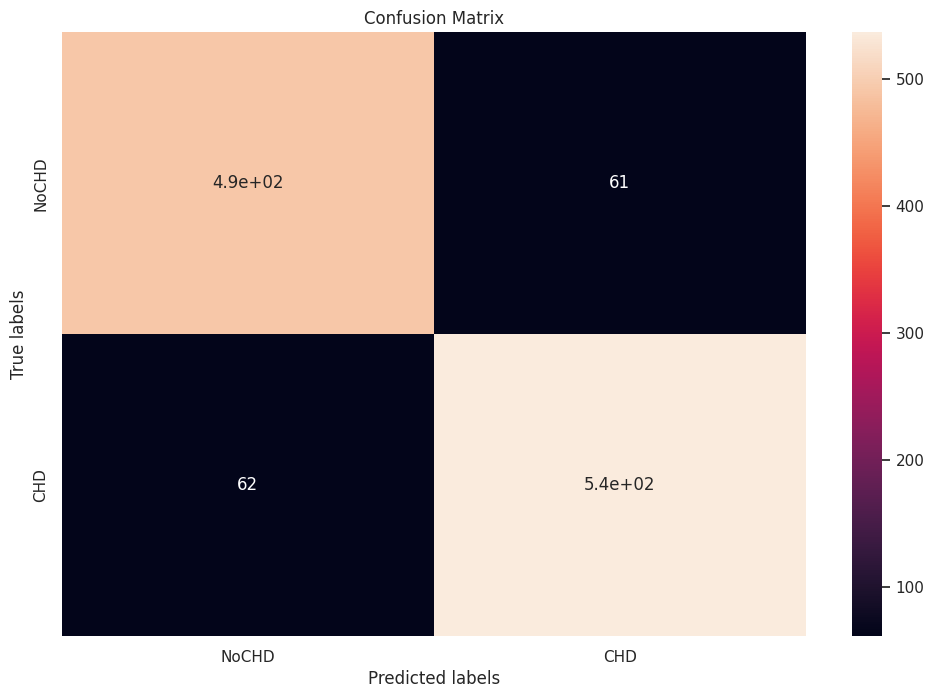

<Figure size 400x300 with 0 Axes>

In [146]:
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
plt.figure(figsize=(4,3))
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [147]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2326
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

 
roc_auc_score
1.0


In [148]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       553
           1       0.90      0.90      0.90       599

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152

 
roc_auc_score
0.8930933714116657


#### 2. Cross- Validation & Hyperparameter Tuning

In [149]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)



# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_sam

In [150]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.747585 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


[[1833  493]
 [ 507 1773]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

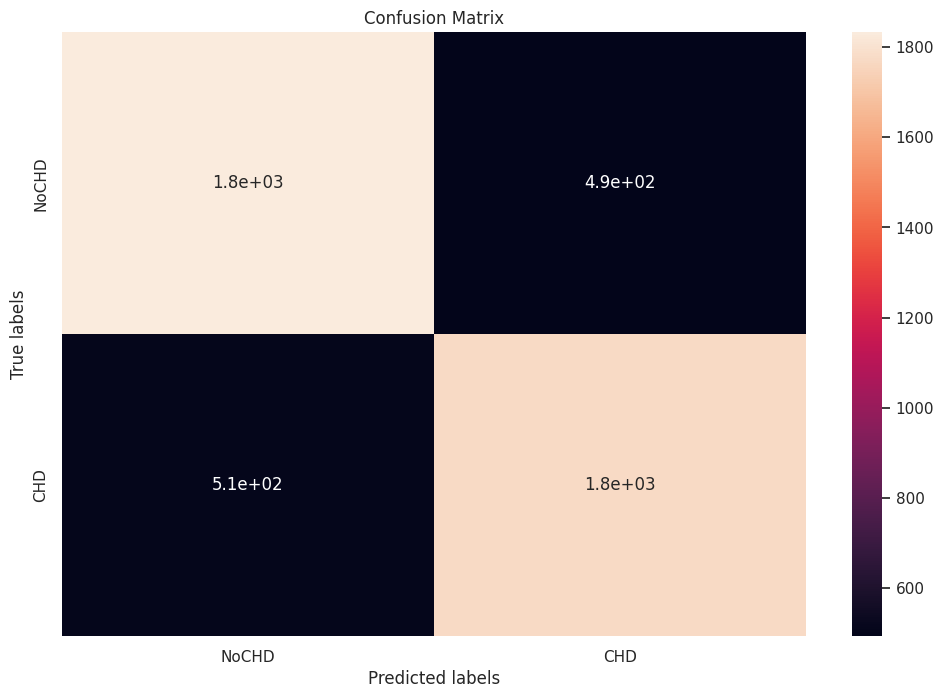

In [151]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[415 138]
 [150 449]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

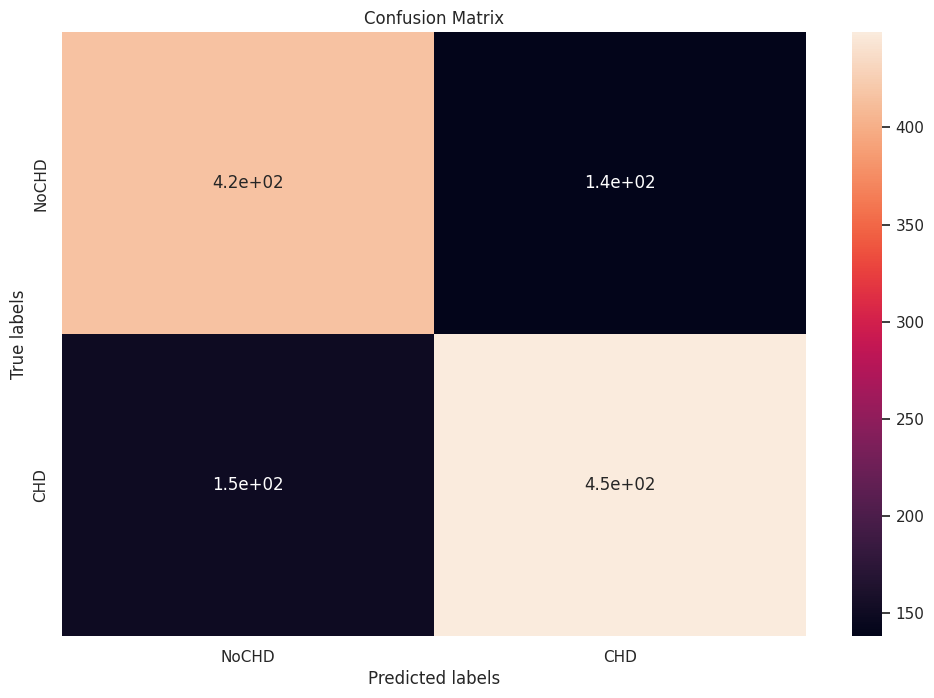

In [152]:
# Get the confusion matrix for both train and test

labels =['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [153]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2326
           1       0.78      0.78      0.78      2280

    accuracy                           0.78      4606
   macro avg       0.78      0.78      0.78      4606
weighted avg       0.78      0.78      0.78      4606

 
roc_auc_score
0.7828398651400643


In [154]:
# Hypertuned Random Forest
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       565
           1       0.75      0.76      0.76       587

    accuracy                           0.75      1152
   macro avg       0.75      0.75      0.75      1152
weighted avg       0.75      0.75      0.75      1152

 
roc_auc_score
0.7500173586477765


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

To get the best prediction results from our model, we should seek out the best hyperparameter values. However, the question of how to locate these ideal sets of hyperparameters arises. The best hyperparameters can be found by using the manual search method, which would require a lot of time to build a single model and involves a hit-and-trial approach

For this reason, methods like Random Search, GridSearch were introduced. 
GridSearchCV automates the process of tuning hyperparameters by systematically trying all possible combinations of hyperparameters specified in a grid, and then evaluating the performance of each combination using cross-validation. Cross-validation is a technique for estimating the performance of a machine learning model by splitting the data into multiple subsets and training the model on some subsets while evaluating it on others.

GridSearchCV returns the best combination of hyperparameters that result in the highest cross-validation score. Once the best hyperparameters are found, they can be used to train the model on the entire dataset and make predictions on new data.
That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

NO we didnot seen any improvementnin our model , even our accuraccy decrese after applying HyperTuning.


### ML Model - 3 - **Implementing SVM Classifier**

In [155]:
#importing library
from sklearn import svm 

In [156]:
#assigning model
svcm = svm.SVC(kernel='poly')

#fitting model
svcm.fit(X_train,y_train)

SVC(kernel='poly')

In [157]:
#getting prediction
train_class_prediction = svcm.predict(X_train) 
test_class_prediction = svcm.predict(X_test) 

In [158]:
# Getting the accuracy scores. 
train_accuracy_svc = accuracy_score(train_class_prediction, y_train) 
test_accuracy_svc = accuracy_score(test_class_prediction, y_test) 

In [159]:
#printing accuraccy
print("The accuracy of train data is ", train_accuracy_svc) 
print("The accuracy of test data is ", test_accuracy_svc)

The accuracy of train data is  0.738384715588363
The accuracy of test data is  0.7048611111111112


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [160]:
#confusion matrix on test
svm_cfs_matrics = confusion_matrix(y_test,test_class_prediction)
svm_cfs_matrics

array([[361, 192],
       [148, 451]])

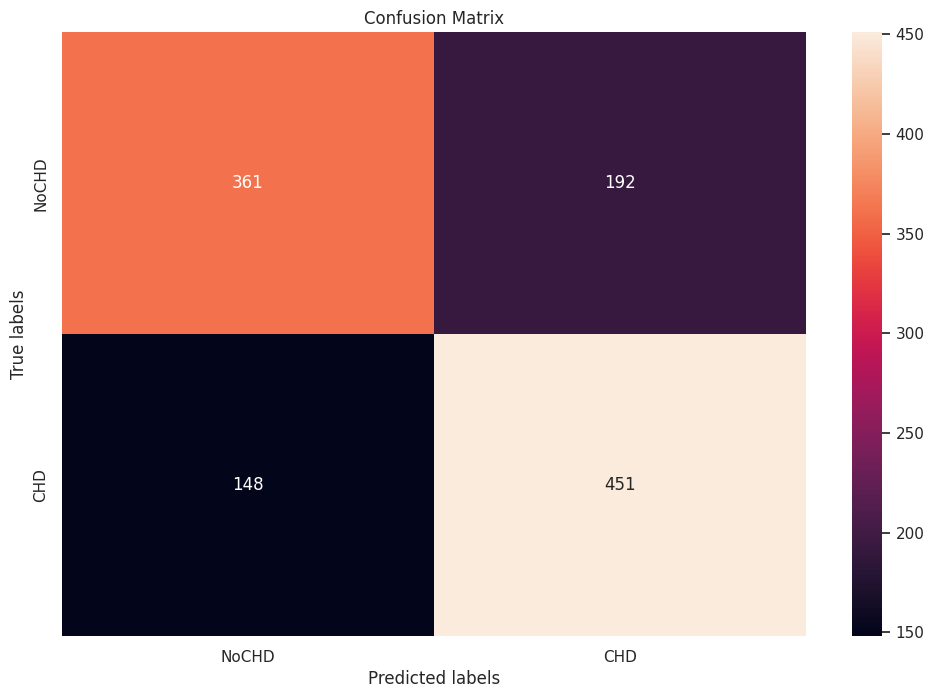

In [161]:
#visulaizing
label= ['NoCHD', 'CHD']
labels = ['361', '192', '148', '451']
labels = np.asarray(labels).reshape(2,2)
cm = confusion_matrix(y_test, test_class_prediction)
#print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)
plt.show()

In [162]:
#confusion matrix on train
svm_cfs_matrics_ = confusion_matrix(y_train,train_class_prediction)
svm_cfs_matrics_

array([[1604,  722],
       [ 483, 1797]])

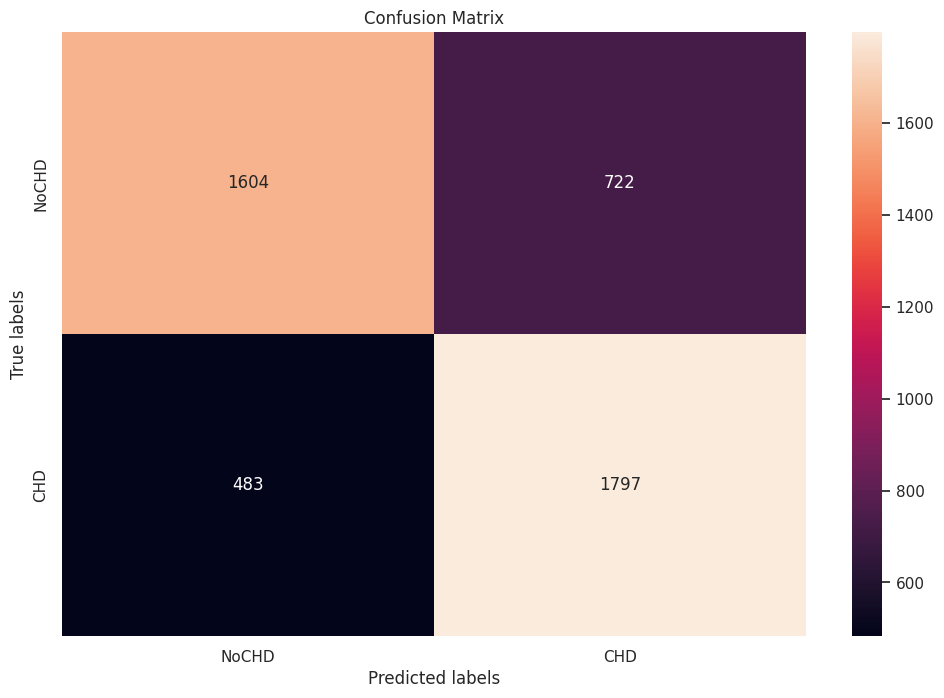

In [163]:
label= ['NoCHD', 'CHD']
labels = ['1604', '722', '483', '1797']
labels = np.asarray(labels).reshape(2,2)
cm = confusion_matrix(y_train, train_class_prediction)
#print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)
plt.show()

### ML Model - 4 - **Implementing KNN Classifier**

In [164]:
#importing library
from sklearn.neighbors import KNeighborsClassifier

In [165]:
#Creating KNN classifier
KNN_clf = KNeighborsClassifier(n_neighbors=5)
# Fit the k-nearest neighbors model on the training data
KNN_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [166]:
#getting prediction
train_knn_prediction = KNN_clf.predict(X_train)
test_knn_prediction = KNN_clf.predict(X_test)

In [167]:
#getting accuracy
train_accuracy_knn = accuracy_score(train_knn_prediction, y_train)
test_accuracy_knn = accuracy_score(test_knn_prediction, y_test)

In [168]:
print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", test_accuracy_knn)

The accuracy on train data is  0.8623534520191055
The accuracy on test data is  0.8246527777777778


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [169]:
knn_cf_matrix = confusion_matrix(y_test,test_knn_prediction)
knn_cf_matrix

array([[367, 186],
       [ 16, 583]])

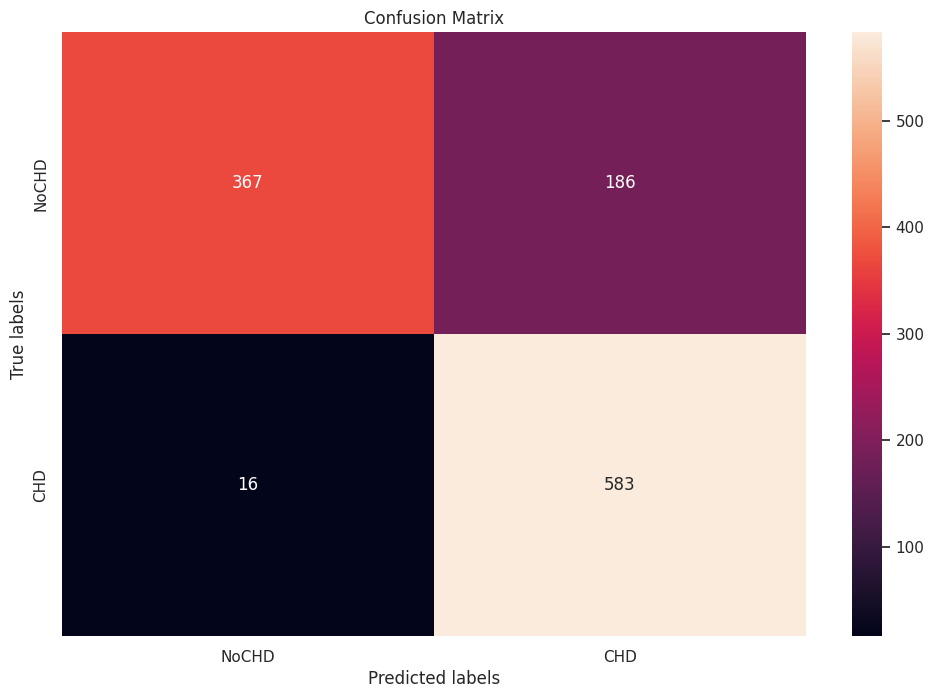

In [170]:
label= ['NoCHD', 'CHD']
labels = ['367', '186', '16', '583']
labels = np.asarray(labels).reshape(2,2)
cm = confusion_matrix(y_test, test_knn_prediction)
#print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [171]:
#Creating KNN classifier.

KNN_clf_hyp = KNeighborsClassifier()

# Using hyperparameter tuning to get the opimal value of n_neighbors

parameters = {'n_neighbors':np.arange(1,10)}
cv_knn_clf = GridSearchCV(KNN_clf_hyp, cv = 5, param_grid = parameters)

# Fitting the model

cv_knn_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [172]:
# Checking the best parameter.

cv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [173]:
# Getting the prediction

train_knn_prediction = cv_knn_clf.predict(X_train)
test_knn_prediction = cv_knn_clf.predict(X_test)

In [174]:
# Getting the accuracy scores for training and testing set.

train_accuracy_knn = accuracy_score(train_knn_prediction, y_train)
test_accuracy_knn = accuracy_score(test_knn_prediction, y_test)

# printing accuracies.

print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", test_accuracy_knn)

The accuracy on train data is  0.9928354320451585
The accuracy on test data is  0.8923611111111112


In [175]:
# Confusion Matrix

knn_cf_matrix = confusion_matrix(y_test,test_knn_prediction)
knn_cf_matrix

array([[465,  88],
       [ 36, 563]])

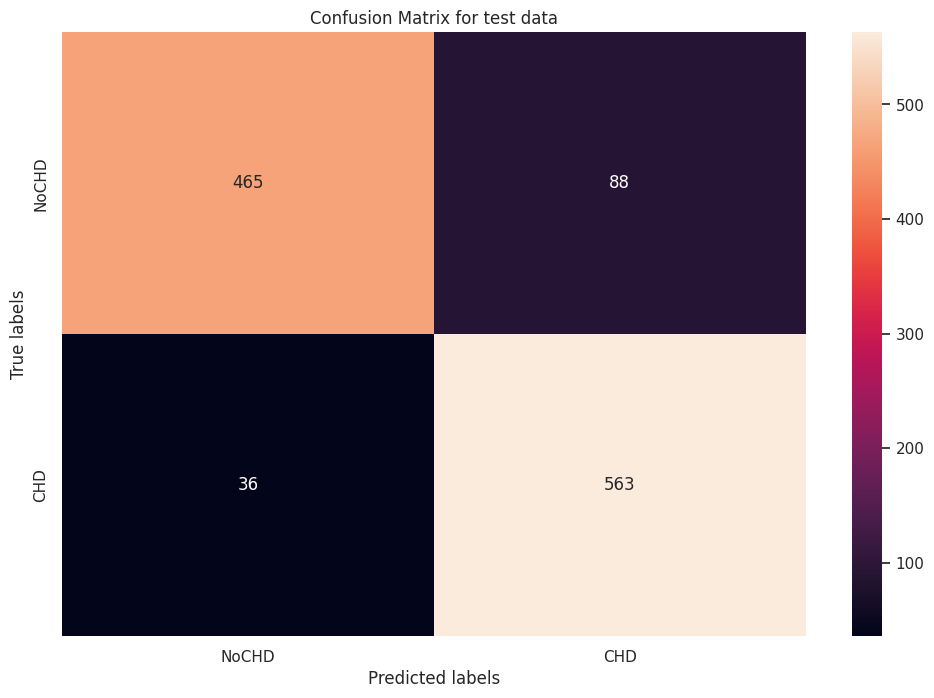

In [176]:
# Plotting the confusion matrix
label= ['NoCHD', 'CHD']
labels = ['465', '88', '36', '563']
labels = np.asarray(labels).reshape(2,2)
cm = confusion_matrix(y_test, test_knn_prediction)
#print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test data')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)
plt.show()


In [177]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,test_knn_prediction)

0.8903839129109093

In [178]:
print(metrics.classification_report(y_train, train_knn_prediction))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_knn_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2326
           1       1.00      0.99      0.99      2280

    accuracy                           0.99      4606
   macro avg       0.99      0.99      0.99      4606
weighted avg       0.99      0.99      0.99      4606

 
roc_auc_score
0.9927631578947369


In [179]:
print(metrics.classification_report(y_test, test_knn_prediction))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_knn_prediction))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       553
           1       0.86      0.94      0.90       599

    accuracy                           0.89      1152
   macro avg       0.90      0.89      0.89      1152
weighted avg       0.90      0.89      0.89      1152

 
roc_auc_score
0.8903839129109093


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

To get the best prediction results from our model, we should seek out the best hyperparameter values. However, the question of how to locate these ideal sets of hyperparameters arises. The best hyperparameters can be found by using the manual search method, which would require a lot of time to build a single model and involves a hit-and-trial approach

For this reason, methods like Random Search, GridSearch were introduced. 
GridSearchCV automates the process of tuning hyperparameters by systematically trying all possible combinations of hyperparameters specified in a grid, and then evaluating the performance of each combination using cross-validation. Cross-validation is a technique for estimating the performance of a machine learning model by splitting the data into multiple subsets and training the model on some subsets while evaluating it on others.

GridSearchCV returns the best combination of hyperparameters that result in the highest cross-validation score. Once the best hyperparameters are found, they can be used to train the model on the entire dataset and make predictions on new data.
That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Again we did not seen much improovement in our model

### ML Model - 5 - **Implementing Decision tree Classifier**

In [180]:
#Importing libraries
from sklearn.tree import DecisionTreeClassifier


In [181]:
# Creating model object for DecisionTreeClassifier.
dtree_clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [182]:

dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [183]:
# Making predictions on train and test data
train_class_dtpreds = dtree_clf.predict(X_train)
test_class_dtpreds = dtree_clf.predict(X_test)

In [184]:
roc_auc_score(y_test,test_class_dtpreds)

0.6580663372045632

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [185]:
#confusion matrix on test
svm_cfs_matrics_test = confusion_matrix(y_test,test_class_dtpreds)
svm_cfs_matrics_test

array([[353, 200],
       [193, 406]])

In [186]:
#confusion matrix on test
svm_cfs_matrics_train = confusion_matrix(y_train,train_class_dtpreds)
svm_cfs_matrics_train

array([[1582,  744],
       [ 691, 1589]])

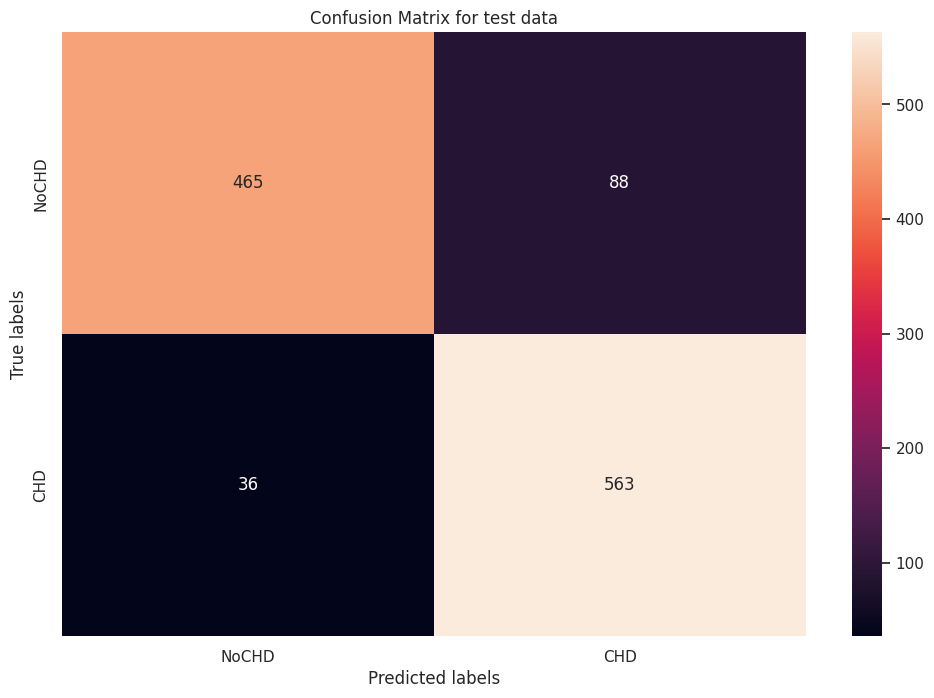

In [187]:
# Plotting the confusion matrix
label= ['NoCHD', 'CHD']
labels = ['465', '88', '36', '563']
labels = np.asarray(labels).reshape(2,2)
cm = confusion_matrix(y_test, test_knn_prediction)
#print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test data')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)
plt.show()


####  Cross- Validation & Hyperparameter Tuning

In [188]:
# Creating model object for DecisionTreeClassifier.
dt_cclf = DecisionTreeClassifier()
# Storing the hyperparameters
parameters = {'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]}

# Applying GridSearchCV
dt_cclf = GridSearchCV(dt_cclf, parameters, scoring='roc_auc', cv=5)

# Fitting the model
dt_cclf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [189]:
# best parameters
dt_cclf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=30)

In [190]:
# Getting the predicted classes

train_dtc_prediction = dt_cclf.predict(X_train)
test_dtc_prediction = dt_cclf.predict(X_test)

In [191]:
 #Getting the accuracy scores

train_accuracy_dtc = accuracy_score(train_dtc_prediction, y_train)
test_accuracy_dtc = accuracy_score(test_dtc_prediction, y_test)

# printing op
print("The accuracy of train data is ", train_accuracy_dtc)
print("The accuracy of test data is ", test_accuracy_dtc)


The accuracy of train data is  0.8067737733391229
The accuracy of test data is  0.7439236111111112


In [192]:
# Confusion Matrix

dtc_clf_matrix = confusion_matrix(y_test,test_dtc_prediction)
dtc_clf_matrix

array([[387, 166],
       [129, 470]])

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

To get the best prediction results from our model, we should seek out the best hyperparameter values. However, the question of how to locate these ideal sets of hyperparameters arises. The best hyperparameters can be found by using the manual search method, which would require a lot of time to build a single model and involves a hit-and-trial approach

For this reason, methods like Random Search, GridSearch were introduced. 
GridSearchCV automates the process of tuning hyperparameters by systematically trying all possible combinations of hyperparameters specified in a grid, and then evaluating the performance of each combination using cross-validation. Cross-validation is a technique for estimating the performance of a machine learning model by splitting the data into multiple subsets and training the model on some subsets while evaluating it on others.

GridSearchCV returns the best combination of hyperparameters that result in the highest cross-validation score. Once the best hyperparameters are found, they can be used to train the model on the entire dataset and make predictions on new data.
That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes we see much improvement in our model after applying GridSearchCV

### ML Model - 6 - **Implementing XgBoost Classifier**

In [193]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2326    0]
 [  24 2256]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

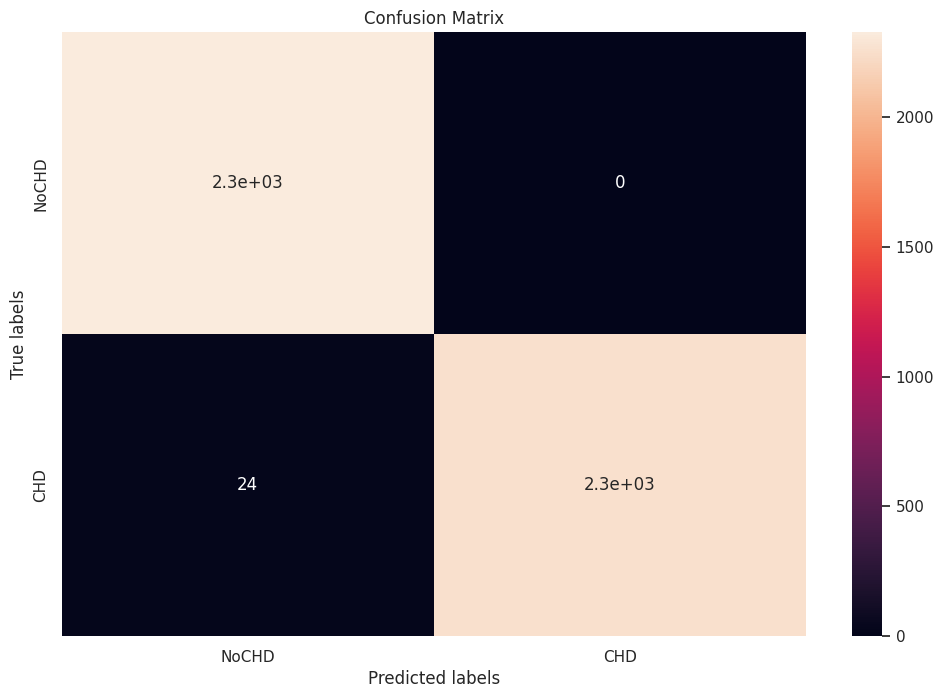

In [194]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[510  43]
 [ 90 509]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

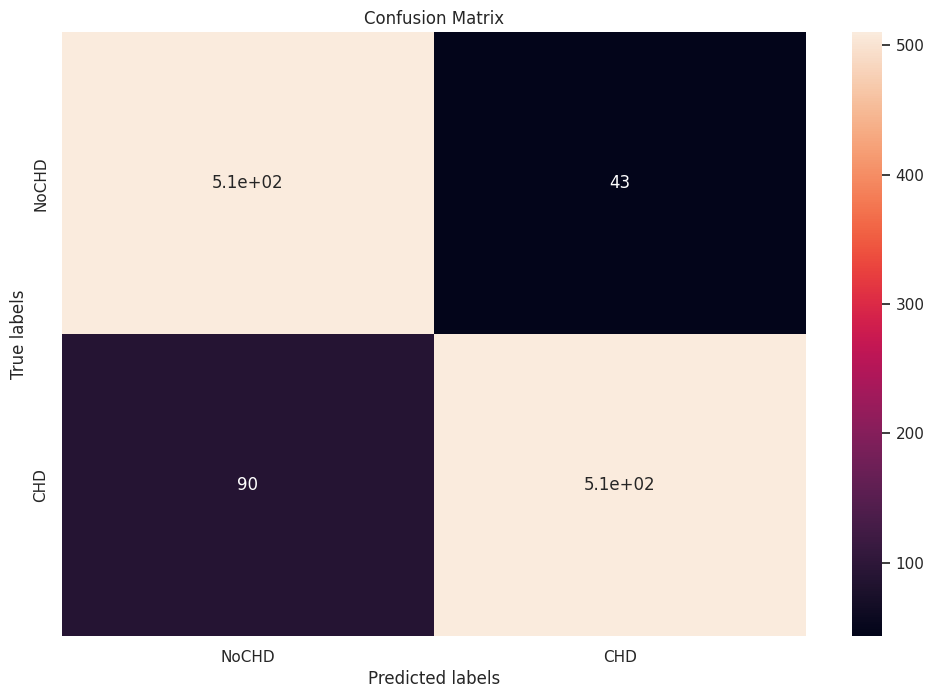

In [195]:
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [196]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2326
           1       1.00      0.99      0.99      2280

    accuracy                           0.99      4606
   macro avg       0.99      0.99      0.99      4606
weighted avg       0.99      0.99      0.99      4606

 
roc_auc_score
0.9947368421052631


In [197]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       553
           1       0.92      0.85      0.88       599

    accuracy                           0.88      1152
   macro avg       0.89      0.89      0.88      1152
weighted avg       0.89      0.88      0.88      1152

 
roc_auc_score
0.8859959486425538


#### 2. Cross- Validation & Hyperparameter Tuning

In [198]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[08:48:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[08:48:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[08:48:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[08:48:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[08:48:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_lea

In [199]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.950782 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 80}


[[2326    0]
 [   1 2279]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

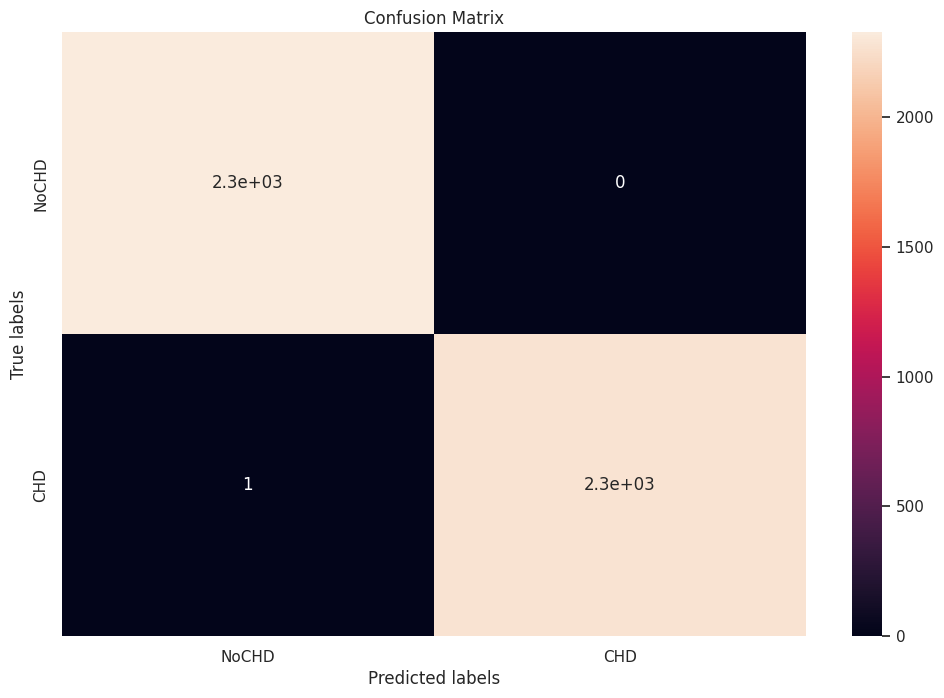

In [200]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[510  43]
 [ 86 513]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

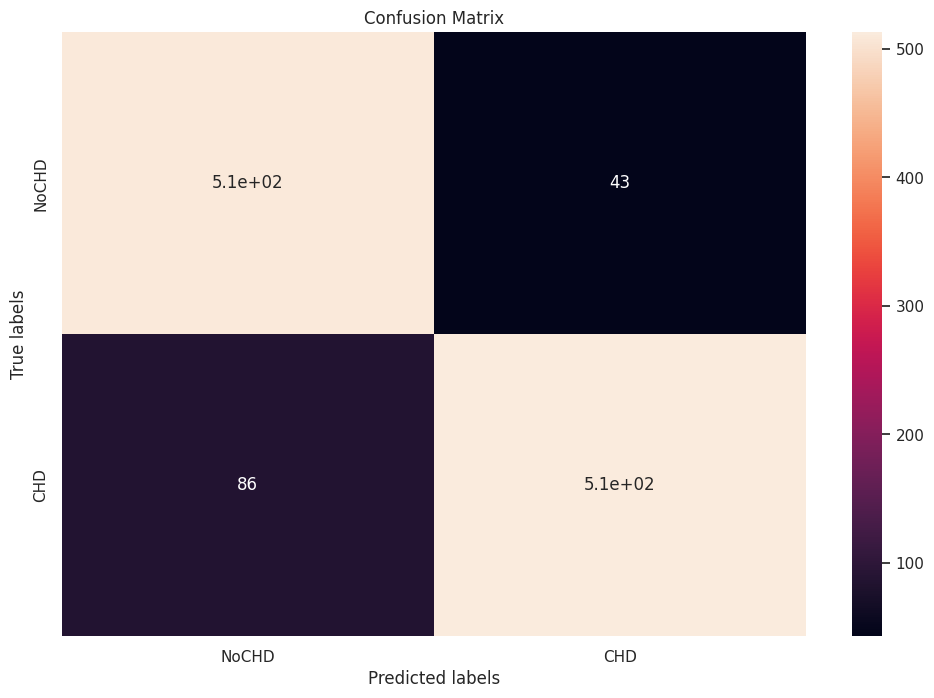

In [201]:
# Get the confusion matrix for both train and test

labels =['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [202]:
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2326
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

 
roc_auc_score
0.999780701754386


In [203]:
print(metrics.classification_report( y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       553
           1       0.92      0.86      0.89       599

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152

 
roc_auc_score
0.8893348468061598


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

To get the best prediction results from our model, we should seek out the best hyperparameter values. However, the question of how to locate these ideal sets of hyperparameters arises. The best hyperparameters can be found by using the manual search method, which would require a lot of time to build a single model and involves a hit-and-trial approach

For this reason, methods like Random Search, GridSearch were introduced. 
GridSearchCV automates the process of tuning hyperparameters by systematically trying all possible combinations of hyperparameters specified in a grid, and then evaluating the performance of each combination using cross-validation. Cross-validation is a technique for estimating the performance of a machine learning model by splitting the data into multiple subsets and training the model on some subsets while evaluating it on others.

GridSearchCV returns the best combination of hyperparameters that result in the highest cross-validation score. Once the best hyperparameters are found, they can be used to train the model on the entire dataset and make predictions on new data.
That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

es, after using HyperParameter, our model has improved significantly. our accuracy is improved 83% to 88% on our test data

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We are using confusion matrics for a positive business impact.

A confusion matrix is a table that is commonly used to evaluate the performance of a machine learning algorithm for a binary classification problem. The matrix provides a summary of the predicted and actual class labels for a set of test data, and it is typically used to calculate various performance metrics, such as accuracy, precision, recall, and F1-score.

A confusion matrix can be a useful tool for evaluating the performance of a machine learning model, which can have a positive impact on businesses in several ways like



1.   Improved accuracy and efficiency
2.   Better customer experience
3.   Increased revenue

Overall, a confusion matrix can be a powerful tool for businesses looking to leverage machine learning to drive positive business impact. By using the matrix to evaluate and improve the performance of their machine learning models, businesses can make better decisions, improve their operations, and provide a better customer experience, all of which can contribute to increased revenue and growth.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the  Random Forest Classifier model because it provided high accuracy and is easy to understand and implement.

The accuracy on train dataset is 1.0


The accuracy on test dataset is 0.8993055555555556

Random Forest Classifier is a popular machine learning algorithm used for classification tasks. It is an ensemble learning method that creates multiple decision trees and combines their outputs to make predictions. The algorithm randomly selects a subset of features and data points and constructs a decision tree for each subset. These decision trees are then combined to make a final prediction. Additionally, Random Forest Classifier can be easily adapted to handle large datasets, making it a scalable choice for many real-world applications.


In [204]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       553
           1       0.92      0.86      0.89       599

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152

 
roc_auc_score
0.8893348468061598


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

A random forest classifier is a machine learning algorithm used for classification tasks, which involves predicting the class or category of a given input based on a set of labeled training data.

It works by constructing multiple decision trees and combining their outputs to make a final prediction. Each decision tree is built using a random subset of the features and training data, which helps to reduce overfitting and improve the generalization ability of the model.

During prediction, the random forest classifier uses a majority voting scheme to decide on the final output class. This means that each decision tree in the forest casts a vote for the predicted class, and the class with the most votes is selected as the final output.

In [205]:
#features important
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

NotFittedError: ignored

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
#fitting the data for plot
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#plotting features important
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:


# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Generate SHAP values
shap_values = explainer.shap_values(X_train)

# Visualize feature importance
shap.summary_plot(shap_values, X_train)

# Explain a single prediction
index = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index], X_train.iloc[index])

# Explain multiple predictions
indices = [0, 1, 2]
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[indices], X_train.iloc[indices])


In [ ]:
!pip install shap --upgrade

In [ ]:

# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Generate SHAP values
shap_values = explainer.shap_values(X_train)

# Visualize feature importance
shap.summary_plot(shap_values, X_train)

# Explain a single prediction
index = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index], X_train.iloc[index])

# Explain multiple predictions
indices = [0, 1, 2]
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[indices], X_train.iloc[indices])


In [ ]:

# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Generate SHAP values
shap_values = explainer.shap_values(X_train)

# Visualize feature importance
shap.summary_plot(shap_values, X_train)

# Explain a single prediction
index = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index,:], X_train.iloc[index,:])

# Explain multiple predictions
indices = [0, 1, 2]
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[indices,:], X_train.iloc[indices,:])


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, all of the features offered in the dataset are crucial and affect the likelihood of developing CHDs. Although, we can draw some very significant features, such as:


*   The likelihood of being diagnosed with heart disease rises with advancing age.

*   Another important factor that contributes to CHDs is smoking.

*   Patients who struggle with diabetes and high cholesterol have a higher risk of CHDs.

*   The likelihood of receiving a CHD diagnosis is higher in patients with Hypertension.

*    Herat rate is another reason for devolopping CHD

*    Additionally, it has been observed that those without education are more susceptible to CHD

*   CHDs are more likely to occur in patients with high blood sugar levels.

*   The risk of CHD development is higher in patients who have had "strokes."

*   The likelihood of receiving a CHD diagnosis is higher in patients with high BMIs.

*    Finally, we can say that RandomForest Classifier outperformed all other models with an accuracy of 90% and an f1-score of 0.91. It is undoubtedly the highest score we have ever received. We can therefore safely say that RandomForest Classifier offers the best solution to our problem.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***